# Business problem
The marketing department of the company would like to target its customers better with 
various ad campaigns, offers, etc. For this purpose, they would like to segment the customers 
into homogeneous groups, and then design marketing strategies for each of the groups

# Tasks
1. What are the different homogenous groups that exist within the customer base?
2. What is the typical buying behavior of customers in each of these groups?
3. For each of the groups, what are some insights/ recommendations in terms of how they 
can be targeted based on their past behavior?


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import gc

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Null Values
1) 1.3 lakhs null values in customer ID


2) Description is missing in 1.4K 

# Univariate Analysis

In [6]:
df.shape

(541909, 8)

In [12]:
#InvoiceNo
df['InvoiceNo'].nunique()

25900

In [13]:
df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].nunique()

3836

In [14]:
#InvoiceNo
df['InvoiceNo'].count()

541909

In [15]:
df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].count()

9288

In [16]:
(9288/541909)*100

1.7139409015166756

### Invoice No
Invoice number. Nominal, a 6-digit integral number uniquely assigned to 
each transaction. If this code starts with letter 'c', it indicates a cancellation

In [19]:
#InvoiceNo
df['InvoiceNo'].nunique()

25900

In [20]:
df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].nunique()

3836

In [21]:
3836/25900

0.14810810810810812

In [22]:
cancelled = list(df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].unique())

In [23]:
cancelled

['C536379',
 'C536383',
 'C536391',
 'C536506',
 'C536543',
 'C536548',
 'C536606',
 'C536622',
 'C536625',
 'C536642',
 'C536734',
 'C536737',
 'C536757',
 'C536758',
 'C536760',
 'C536807',
 'C536812',
 'C536814',
 'C536815',
 'C536816',
 'C536817',
 'C536818',
 'C536820',
 'C536822',
 'C536825',
 'C536826',
 'C536827',
 'C536828',
 'C536829',
 'C536850',
 'C536853',
 'C536854',
 'C536855',
 'C536978',
 'C536979',
 'C537024',
 'C537039',
 'C537043',
 'C537132',
 'C537143',
 'C537157',
 'C537164',
 'C537203',
 'C537232',
 'C537234',
 'C537251',
 'C537314',
 'C537320',
 'C537333',
 'C537373',
 'C537379',
 'C537383',
 'C537398',
 'C537402',
 'C537406',
 'C537408',
 'C537413',
 'C537414',
 'C537416',
 'C537417',
 'C537431',
 'C537444',
 'C537445',
 'C537530',
 'C537572',
 'C537581',
 'C537596',
 'C537597',
 'C537600',
 'C537602',
 'C537610',
 'C537611',
 'C537613',
 'C537630',
 'C537644',
 'C537647',
 'C537651',
 'C537652',
 'C537656',
 'C537677',
 'C537684',
 'C537746',
 'C537756',
 'C5

In [24]:
df['cancelled'] = 0
df.loc[df['InvoiceNo'].isin(cancelled),'cancelled'] = 1

In [25]:
# df[df['cancelled'] == 1]['Description'].unique()

In [26]:
df[df['Description'] != 'Adjust bad debt']['UnitPrice'].describe()

count    541906.000000
mean          4.631552
std          93.192775
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [27]:
df[df['UnitPrice'] == -0.000000]['InvoiceNo'].nunique()

2155

In [28]:
df[df['Description'] != 'Adjust bad debt']['UnitPrice'].describe()

count    541906.000000
mean          4.631552
std          93.192775
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

### Stock Code
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to 
each distinct product

In [29]:
df['StockCode'].nunique()

4070

### Description

In [30]:
df['Description'].nunique()

4223

In [31]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
John Lewis                               1
Found by jackie                          1
sold with wrong barcode                  1
BLUE FLYING SINGING CANARY               1
MUMMY MOUSE RED GINGHAM RIBBON           1
Name: Description, Length: 4223, dtype: int64

##### 
Total of 4223 products description is available

WHITE HANGING HEART T-LIGHT HOLDER -> is the most ordered item

REGENCY CAKESTAND 3 TIER -> second highest

### Quantity

In [32]:
df['Quantity'].max()

80995

In [33]:
df['Quantity'].min()

-80995

In [34]:
df['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64

In [35]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
    ax[1].set_title('Box plot of Age distribution')

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

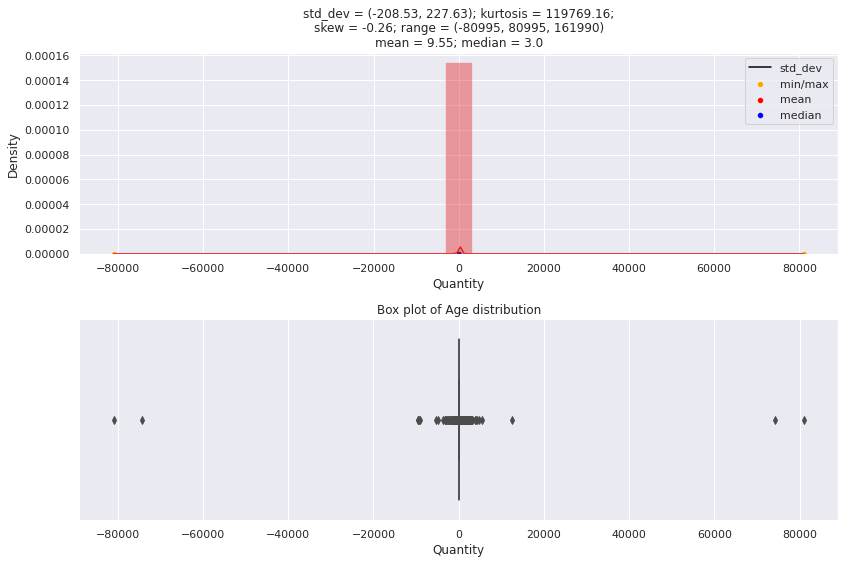

In [36]:
cont_univ(df['Quantity'])

##### Huge outliers can be seen in this variable

In [37]:
df[df['Quantity'] <= df['Quantity'].quantile(.99)]['Quantity'].describe()

count    536959.00000
mean          6.88465
std         154.30905
min      -80995.00000
25%           1.00000
50%           3.00000
75%          10.00000
max         100.00000
Name: Quantity, dtype: float64

##### we can see 99% quantile of the data, has the max orders of 100 and least is in negative( maybe be a cancelled order) 

<Figure size 720x576 with 0 Axes>

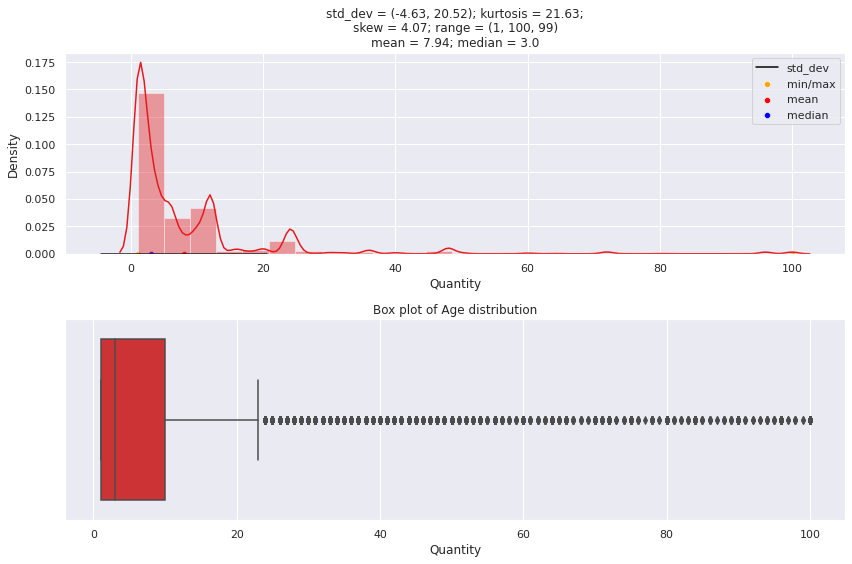

In [38]:
cont_univ(df[(df['Quantity'] > 0) & (df['Quantity'] <= 100)]['Quantity'])

##### 
Median is 3 quantities per order.

on an average ppl order a product with 8 quantity. And its rightly skewed

##### 
numerical value, lets analyse in the bi variate analysis

### InvoiceDate

In [39]:
df['InvoiceDate'].dtypes

dtype('O')

In [40]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [41]:
df['InvoiceDate'].min()

Timestamp('2010-01-12 08:26:00')

In [42]:
df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [43]:
df['InvoiceDate'].value_counts()

2011-10-31 14:41:00    1114
2011-08-12 09:28:00     749
2011-09-12 10:03:00     731
2011-05-12 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-07-21 17:51:00       1
2011-11-14 13:50:00       1
2011-09-03 16:33:00       1
2011-02-15 15:41:00       1
2011-03-11 14:53:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

##### 
almost 2 years of data is available with us

most orders are made on 2011-10-31 (1114)

In [44]:
df['day'] = df['InvoiceDate'].dt.day_name()

In [45]:
df['month'] = df['InvoiceDate'].dt.month_name()

In [46]:
df['year'] = df['InvoiceDate'].dt.year

In [47]:
df['hour'] = df['InvoiceDate'].dt.hour

In [48]:
df['month_year'] = df['year'].apply(str) + "-" + df['month'].apply(str)

In [49]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
cancelled               int64
day                    object
month                  object
year                    int64
hour                    int64
month_year             object
dtype: object

In [50]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0,Monday,September,2011,12,2011-September
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0,Monday,September,2011,12,2011-September
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0,Monday,September,2011,12,2011-September
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0,Monday,September,2011,12,2011-September


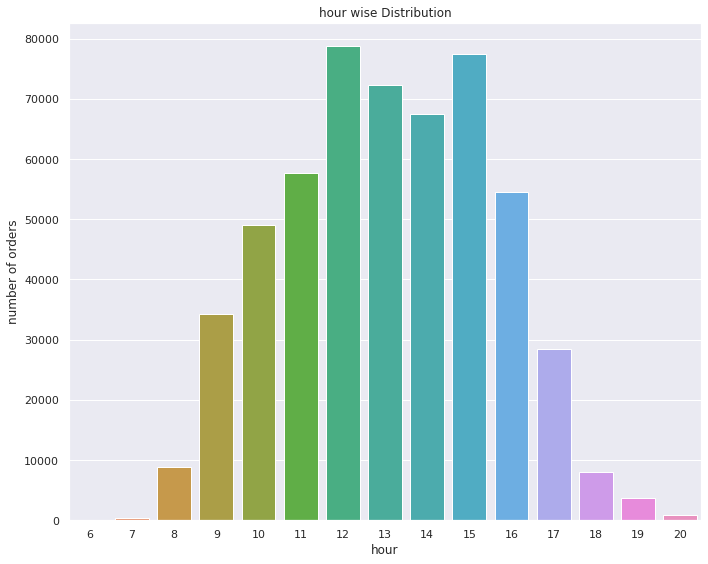

In [51]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['hour'])

plt.title('hour wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

In [52]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# df['day'] = df['day'].astype('category', categories=cats, ordered=True)

In [53]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day'] = df['day'].astype(cat_type)

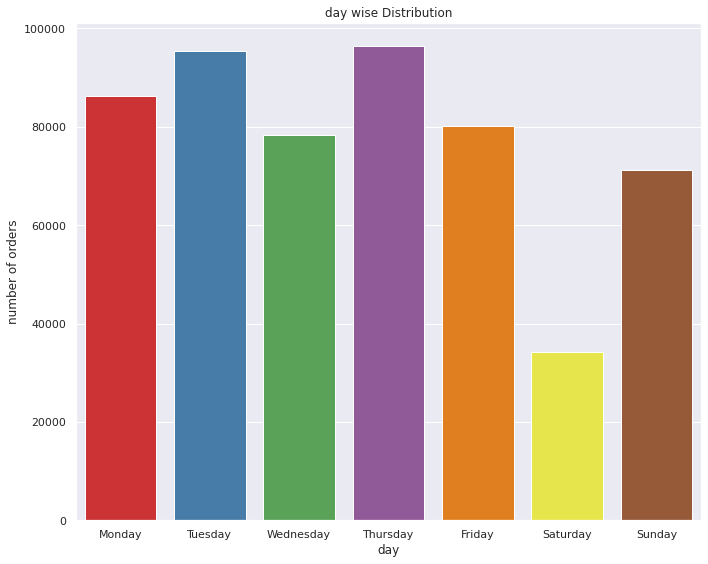

In [54]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['day'])

plt.title('day wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

In [55]:
cats_m = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats_m, ordered=True)
df['month'] = df['month'].astype(cat_type)


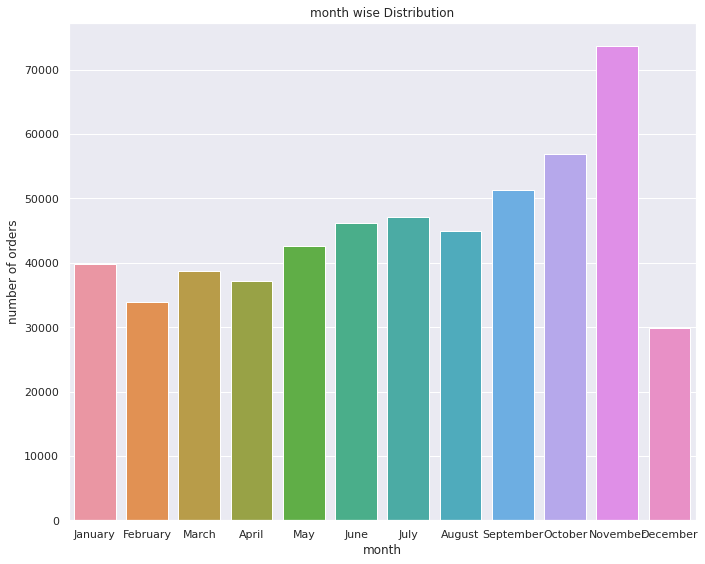

In [56]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['month'])

plt.title('month wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

Text(0, 0.5, 'number of orders')

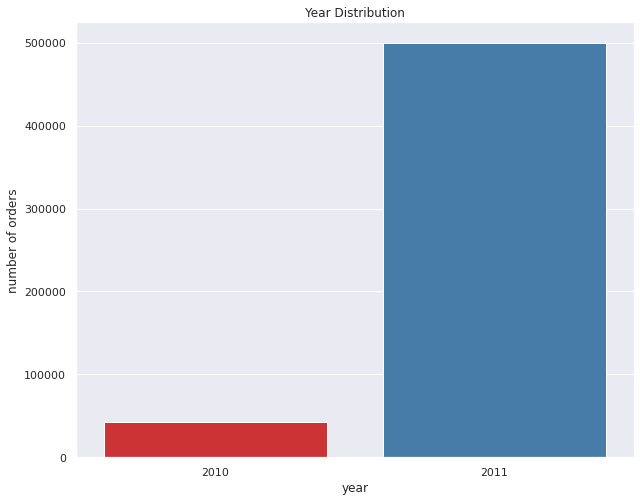

In [57]:
plt.figure(figsize=(10,8))

sns.countplot(df['year'])

plt.title('Year Distribution')
plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

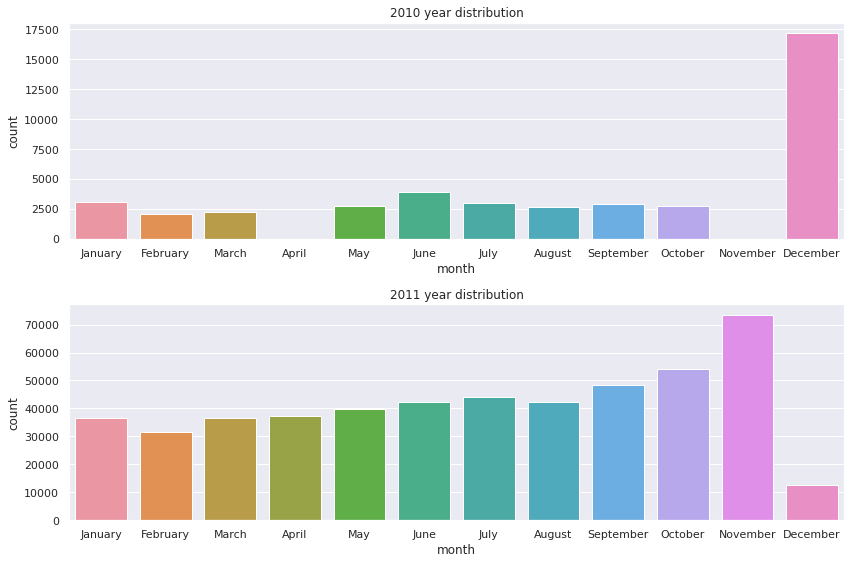

In [58]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[df['year'] == 2010]['month'],ax=ax[0])
ax[0].set_title('2010 year distribution')


sns.countplot(df[df['year'] == 2011]['month'],ax=ax[1])
ax[1].set_title('2011 year distribution')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

In [59]:
max(df['InvoiceDate'])

Timestamp('2011-12-10 17:19:00')

##### most of the order are placed in 2011, November is the highest month with more order.

can see a increasing trend in 2011

### UnitPrice

In [60]:
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

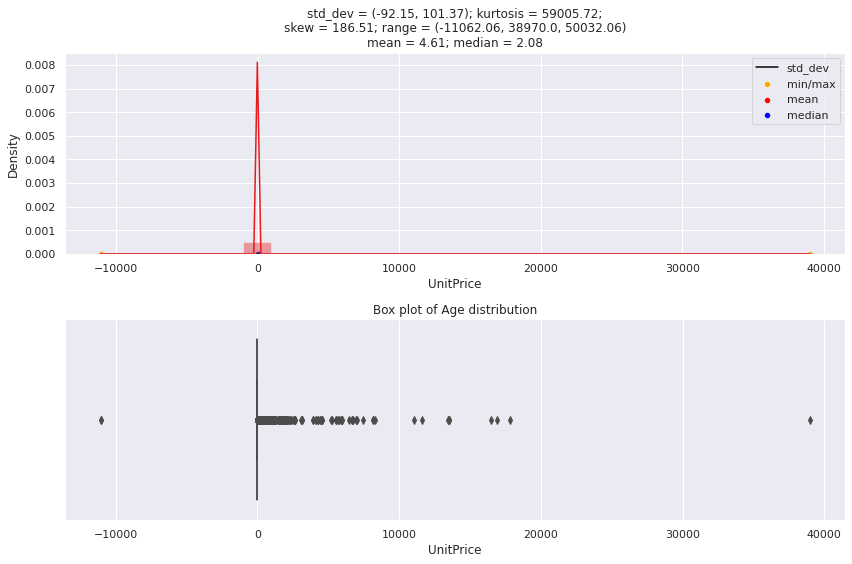

In [61]:
cont_univ(df['UnitPrice'])

In [62]:
df[df['UnitPrice'] <= df['UnitPrice'].quantile(.99)]['UnitPrice'].describe()

count    537119.000000
mean          3.075530
std          21.562329
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max          18.000000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

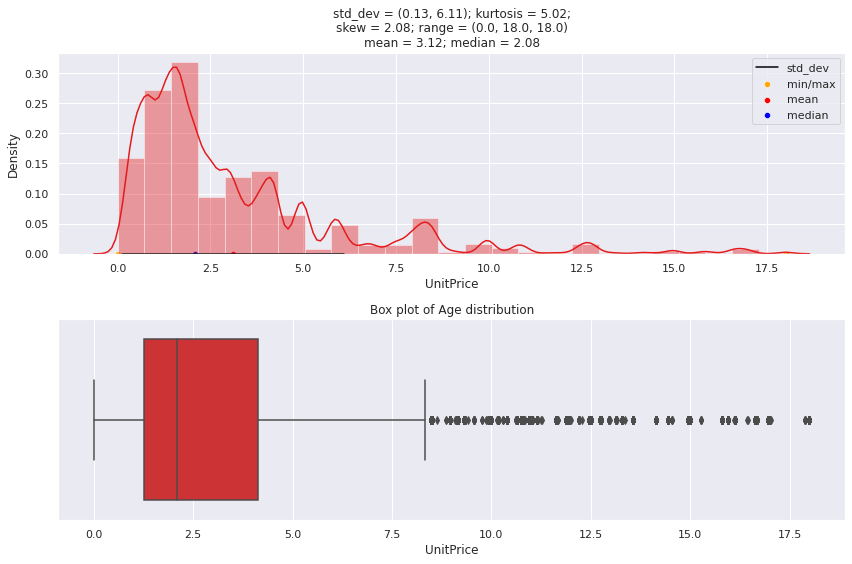

In [63]:
cont_univ(
    df[(df['UnitPrice'] > 0) & (df['UnitPrice'] <= 18) & (df['cancelled'] == 0)
       & (df['Description'] != 'Adjust bad debt')]['UnitPrice'])

### CustomerID

In [64]:
df['CustomerID'].nunique()

4372

In [65]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
cancelled               int64
day                  category
month                category
year                    int64
hour                    int64
month_year             object
dtype: object

##### 4372 have made a order during the time period

### Country

In [66]:
df['Country'].nunique()

38

In [67]:
round(df['Country'].value_counts(normalize=True)*100,1).apply(str) + "%"

United Kingdom          91.4%
Germany                  1.8%
France                   1.6%
EIRE                     1.5%
Spain                    0.5%
Netherlands              0.4%
Belgium                  0.4%
Switzerland              0.4%
Portugal                 0.3%
Australia                0.2%
Norway                   0.2%
Italy                    0.1%
Channel Islands          0.1%
Finland                  0.1%
Cyprus                   0.1%
Sweden                   0.1%
Unspecified              0.1%
Austria                  0.1%
Denmark                  0.1%
Japan                    0.1%
Poland                   0.1%
Israel                   0.1%
USA                      0.1%
Hong Kong                0.1%
Singapore                0.0%
Iceland                  0.0%
Canada                   0.0%
Greece                   0.0%
Malta                    0.0%
United Arab Emirates     0.0%
European Community       0.0%
RSA                      0.0%
Lebanon                  0.0%
Lithuania 

###### 91% of the orders are from UK

# Bi variate Analysis

In [68]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0,Monday,September,2011,12,2011-September
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0,Monday,September,2011,12,2011-September
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0,Monday,September,2011,12,2011-September
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0,Monday,September,2011,12,2011-September


### Customer getting more quantity and placing more order

In [69]:
df.groupby(['CustomerID'],as_index=False)['InvoiceDate'].nunique().sort_values('InvoiceDate',ascending=False)

,CustomerID,InvoiceDate
1895,14911.0,248
330,12748.0,225
4042,17841.0,168
1674,14606.0,129
2192,15311.0,118
...,...,...
826,13441.0,1
829,13449.0,1
1609,14518.0,1
2514,15739.0,1


In [70]:
df.groupby(['CustomerID'],as_index=False)['Quantity'].sum().sort_values('Quantity',ascending=False)

,CustomerID,Quantity
1703,14646.0,196719
55,12415.0,77242
1895,14911.0,77180
3758,17450.0,69029
4233,18102.0,64122
...,...,...
2892,16252.0,-158
3245,16742.0,-189
1384,14213.0,-244
2578,15823.0,-283


### Highest selling product and highest priced product

In [71]:
df.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values('Quantity',ascending=False).head(10)

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [72]:
df.groupby(['Description'],as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate',ascending=False).head(10)

,Description,InvoiceDate
3918,WHITE HANGING HEART T-LIGHT HOLDER,2369
2915,REGENCY CAKESTAND 3 TIER,2200
1866,JUMBO BAG RED RETROSPOT,2159
2471,PARTY BUNTING,1727
2054,LUNCH BAG RED RETROSPOT,1638
244,ASSORTED COLOUR BIRD ORNAMENT,1501
3195,SET OF 3 CAKE TINS PANTRY DESIGN,1473
2395,PACK OF 72 RETROSPOT CAKE CASES,1385
2046,LUNCH BAG BLACK SKULL.,1350
2253,NATURAL SLATE HEART CHALKBOARD,1280


In [73]:
df[df['cancelled'] == 1].groupby(['Description'],as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate',ascending=False).head(10)

,Description,InvoiceDate
1093,Manual,244
1399,REGENCY CAKESTAND 3 TIER,181
1305,POSTAGE,126
887,JAM MAKING SET WITH JARS,87
538,Discount,77
1534,SET OF 3 CAKE TINS PANTRY DESIGN,74
1480,SAMPLES,61
1709,STRAWBERRY CERAMIC TRINKET BOX,55
1457,ROSES REGENCY TEACUP AND SAUCER,54
1323,RECIPE BOX PANTRY YELLOW DESIGN,47


In [74]:
df.groupby(['Description'],as_index=False).agg({'UnitPrice':[np.mean,np.sum,np.median]})

Description UnitPrice               
                                          mean     sum median
0      4 PURPLE FLOCK DINNER CANDLES  2.455366  100.67   2.55
1      50'S CHRISTMAS GIFT BAG LARGE  1.425231  185.28   1.25
2                  DOLLY GIRL BEAKER  1.499337  271.38   1.25
3        I LOVE LONDON MINI BACKPACK  4.611364  405.80   4.15
4        I LOVE LONDON MINI RUCKSACK  4.150000    4.15   4.15
...                              ...       ...     ...    ...
4218     wrongly marked carton 22804  0.000000    0.00   0.00
4219    wrongly marked. 23343 in box  0.000000    0.00   0.00
4220    wrongly sold (22719) barcode  0.000000    0.00   0.00
4221            wrongly sold as sets  0.000000    0.00   0.00
4222               wrongly sold sets  0.000000    0.00   0.00

[4223 rows x 4 columns]

In [75]:
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [76]:
df[df['cancelled'] == 0].groupby(['Description'],as_index=False).agg({'total_price':np.sum}).sort_values('total_price',ascending=False).head(10)

,Description,total_price
1091,DOTCOM POSTAGE,206248.77
2904,REGENCY CAKESTAND 3 TIER,174484.74
2436,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3903,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
2462,PARTY BUNTING,99504.33
1857,JUMBO BAG RED RETROSPOT,94340.05
2095,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
2237,Manual,78112.82
2742,POSTAGE,78101.88
2792,RABBIT NIGHT LIGHT,66964.99


In [77]:
df[df['cancelled'] == 1].groupby(['Description'],as_index=False).agg({'total_price':np.sum}).sort_values('total_price').head(10)

,Description,total_price
79,AMAZON FEE,-235281.59
1184,"PAPER CRAFT , LITTLE BIRDIE",-168469.60
1093,Manual,-146784.46
1025,MEDIUM CERAMIC TOP STORAGE JAR,-77479.64
1305,POSTAGE,-11871.24
1399,REGENCY CAKESTAND 3 TIER,-9722.55
441,CRUK Commission,-7933.43
271,Bank Charges,-7340.64
1888,WHITE HANGING HEART T-LIGHT HOLDER,-6624.30
592,FAIRY CAKE FLANNEL ASSORTED COLOUR,-6591.42


In [78]:
df.groupby(['Description'],as_index=False).agg({'UnitPrice':[np.mean,np.sum,np.median],'total_price':np.sum})

Description UnitPrice                total_price
                                          mean     sum median         sum
0      4 PURPLE FLOCK DINNER CANDLES  2.455366  100.67   2.55      290.80
1      50'S CHRISTMAS GIFT BAG LARGE  1.425231  185.28   1.25     2341.13
2                  DOLLY GIRL BEAKER  1.499337  271.38   1.25     2882.50
3        I LOVE LONDON MINI BACKPACK  4.611364  405.80   4.15     1628.17
4        I LOVE LONDON MINI RUCKSACK  4.150000    4.15   4.15        4.15
...                              ...       ...     ...    ...         ...
4218     wrongly marked carton 22804  0.000000    0.00   0.00        0.00
4219    wrongly marked. 23343 in box  0.000000    0.00   0.00        0.00
4220    wrongly sold (22719) barcode  0.000000    0.00   0.00        0.00
4221            wrongly sold as sets  0.000000    0.00   0.00        0.00
4222               wrongly sold sets  0.000000    0.00   0.00        0.00

[4223 rows x 5 columns]

### Uk vs rest of country analysis

In [79]:
df[df['Country'] == 'United Kingdom'].groupby(['Description'],as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate',ascending=False).head(10)

,Description,InvoiceDate
3898,WHITE HANGING HEART T-LIGHT HOLDER,2271
1858,JUMBO BAG RED RETROSPOT,2001
2899,REGENCY CAKESTAND 3 TIER,1859
2460,PARTY BUNTING,1634
2045,LUNCH BAG RED RETROSPOT,1460
242,ASSORTED COLOUR BIRD ORNAMENT,1416
3177,SET OF 3 CAKE TINS PANTRY DESIGN,1316
2037,LUNCH BAG BLACK SKULL.,1292
2242,NATURAL SLATE HEART CHALKBOARD,1250
1703,HEART OF WICKER SMALL,1199


In [80]:
df[df['Country'] != 'United Kingdom'].groupby(['Description'],as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate',ascending=False).head(10)

,Description,InvoiceDate
1936,POSTAGE,1112
2055,REGENCY CAKESTAND 3 TIER,341
2145,ROUND SNACK BOXES SET OF4 WOODLAND,317
1903,PLASTERS IN TIN WOODLAND ANIMALS,225
1898,PLASTERS IN TIN CIRCUS PARADE,210
2497,SPACEBOY LUNCH BOX,202
2143,ROUND SNACK BOXES SET OF 4 FRUITS,197
2049,RED TOADSTOOL LED NIGHT LIGHT,196
1687,PACK OF 72 RETROSPOT CAKE CASES,195
1900,PLASTERS IN TIN SPACEBOY,184


In [81]:
df[df['cancelled'] == 1].groupby(['Country'],as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate',ascending=False).head(10)

,Country,InvoiceDate
29,United Kingdom,7856
12,Germany,453
8,EIRE,302
11,France,149
28,USA,112
0,Australia,74
25,Spain,48
16,Italy,45
3,Belgium,38
17,Japan,37


<Figure size 720x576 with 0 Axes>

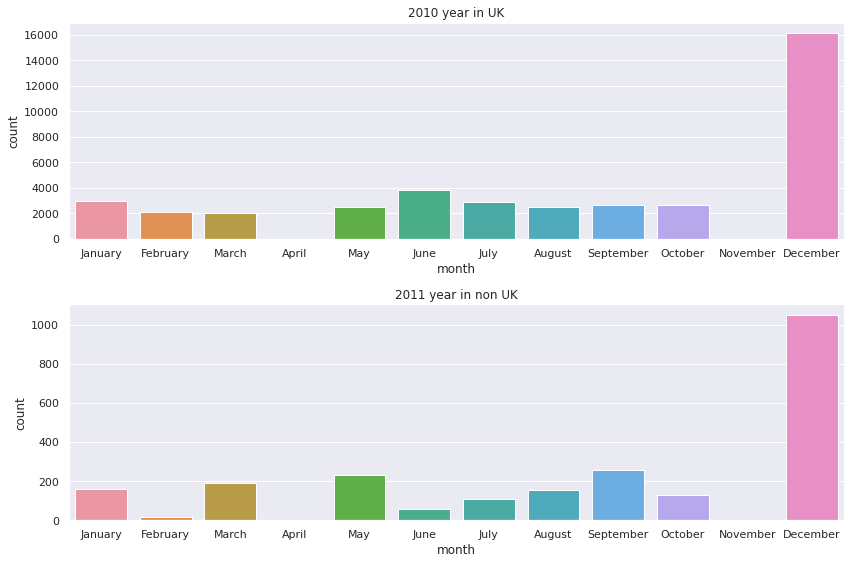

In [82]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[(df['year'] == 2010) & (df['Country'] == 'United Kingdom')]['month'],ax=ax[0])
ax[0].set_title('2010 year in UK')


sns.countplot(df[(df['year'] == 2010) & (df['Country'] != 'United Kingdom')]['month'],ax=ax[1])
ax[1].set_title('2011 year in non UK')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

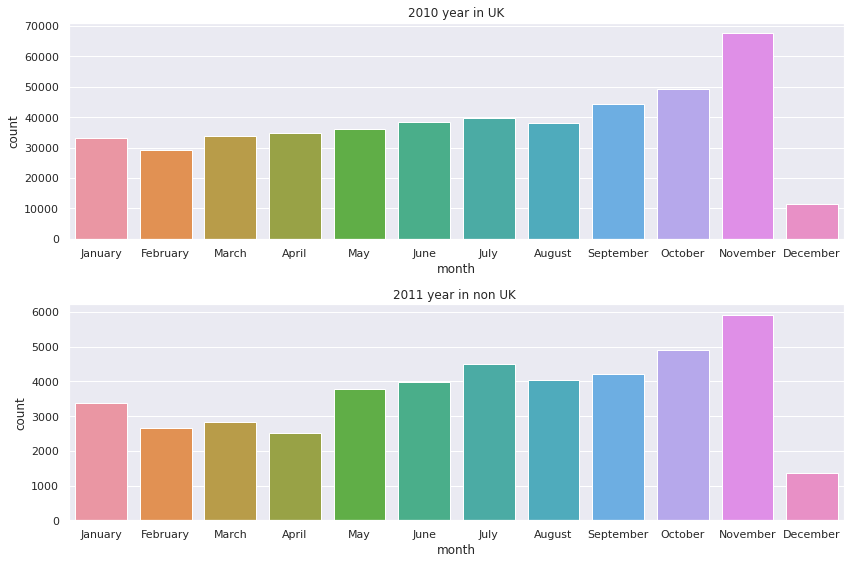

In [83]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[(df['year'] == 2011) & (df['Country'] == 'United Kingdom')]['month'],ax=ax[0])
ax[0].set_title('2010 year in UK')


sns.countplot(df[(df['year'] == 2011) & (df['Country'] != 'United Kingdom')]['month'],ax=ax[1])
ax[1].set_title('2011 year in non UK ')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

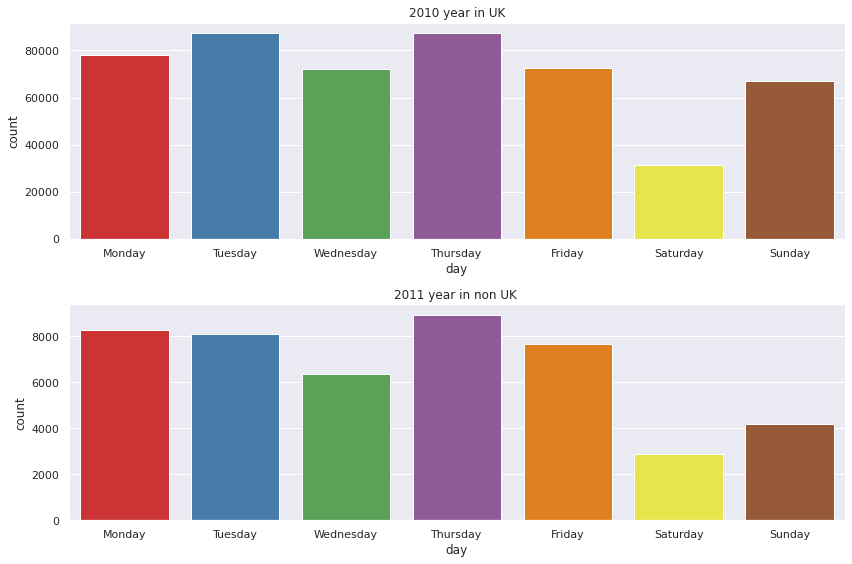

In [84]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[df['Country'] == 'United Kingdom']['day'],ax=ax[0])
ax[0].set_title('2010 year in UK')


sns.countplot(df[df['Country'] != 'United Kingdom']['day'],ax=ax[1])
ax[1].set_title('2011 year in non UK ')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

#### Can see a similar distribution in both Uk and non UK countries

### Calcelled Order Analysis

<Figure size 720x576 with 0 Axes>

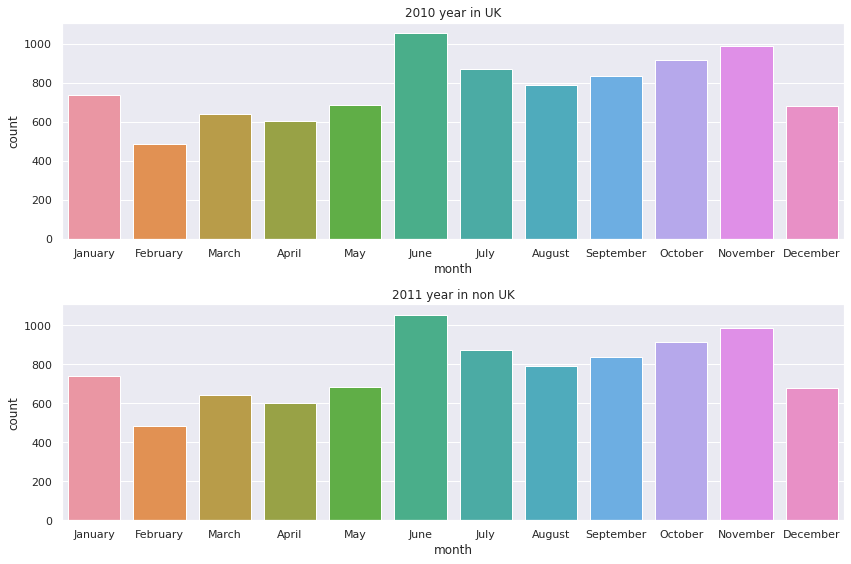

In [85]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[df['cancelled'] == 1]['month'],ax=ax[0])
ax[0].set_title('2010 year in UK')


sns.countplot(df[df['cancelled'] == 1]['month'],ax=ax[1])
ax[1].set_title('2011 year in non UK')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

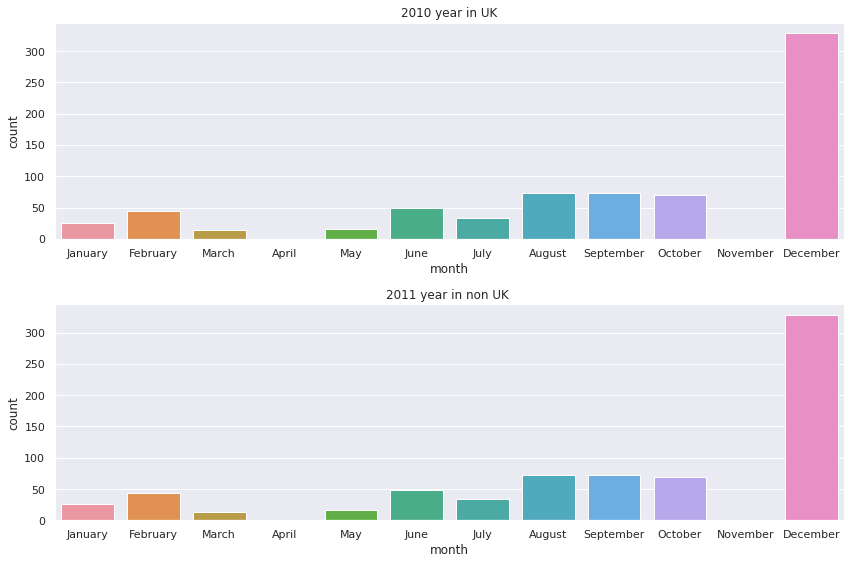

In [86]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[(df['year'] == 2010) & (df['cancelled'] == 1)]['month'],ax=ax[0])
ax[0].set_title('2010 year in UK')


sns.countplot(df[(df['year'] == 2010) & (df['cancelled'] == 1)]['month'],ax=ax[1])
ax[1].set_title('2011 year in non UK ')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

#### Cancelled rate is same across years and months and days and hour

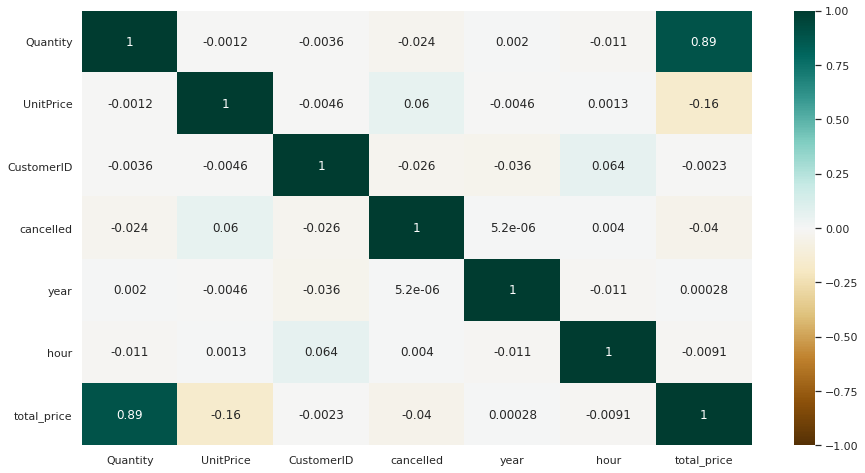

In [87]:
plt.figure(figsize=(15,8))

heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Modelling data preparation

In [88]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34


In [89]:
round(df['Country'].value_counts(normalize=True)*100,1).apply(str) + "%"

United Kingdom          91.4%
Germany                  1.8%
France                   1.6%
EIRE                     1.5%
Spain                    0.5%
Netherlands              0.4%
Belgium                  0.4%
Switzerland              0.4%
Portugal                 0.3%
Australia                0.2%
Norway                   0.2%
Italy                    0.1%
Channel Islands          0.1%
Finland                  0.1%
Cyprus                   0.1%
Sweden                   0.1%
Unspecified              0.1%
Austria                  0.1%
Denmark                  0.1%
Japan                    0.1%
Poland                   0.1%
Israel                   0.1%
USA                      0.1%
Hong Kong                0.1%
Singapore                0.0%
Iceland                  0.0%
Canada                   0.0%
Greece                   0.0%
Malta                    0.0%
United Arab Emirates     0.0%
European Community       0.0%
RSA                      0.0%
Lebanon                  0.0%
Lithuania 

In [90]:
df['Tier'] = 'Tier 3'
df.loc[df['Country'].isin(['United Kingdom']), 'Tier'] = 'Tier 1'
df.loc[df['Country'].isin([
    'Germany', 'France', 'EIRE', 'Spain', 'Netherlands', 'Belgium',
    'Switzerland', 'Portugal', 'Australia'
]), 'Tier'] = 'Tier 2'

In [91]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1


In [92]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
cancelled               int64
day                  category
month                category
year                    int64
hour                    int64
month_year             object
total_price           float64
Tier                   object
dtype: object

In [93]:
df['bad_debt'] = 0
df.loc[(df['Description'] == 'Adjust bad debt'),'bad_debt'] = 1

In [94]:
df[(df['bad_debt'] == 0) & (df['cancelled'] == 0)]['UnitPrice'].describe()

count    532618.000000
mean          3.868412
std          32.470442
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [95]:
df[(df['bad_debt'] == 0) & (df['cancelled'] == 0)]['Quantity'].describe()

count    532618.000000
mean         10.240024
std         159.593999
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [96]:
# df.loc[(df['bad_debt'] == 0) & (df['cancelled'] == 0 ) & (df['UnitPrice'] == 0),'UnitPrice'] = df['UnitPrice'].median()

In [97]:
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [98]:
df[df['total_price'] <= 0]['CustomerID'].nunique()

1597

In [99]:
df.loc[(df['total_price'] < 0) & (df['cancelled'] == 0),'bad_debt'] = 1

#### imputing discripency in the unit price

In [100]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0,Monday,September,2011,12,2011-September,10.20,Tier 2,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0,Monday,September,2011,12,2011-September,12.60,Tier 2,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0,Monday,September,2011,12,2011-September,16.60,Tier 2,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0,Monday,September,2011,12,2011-September,16.60,Tier 2,0


In [101]:
fm = df.groupby(['CustomerID'],as_index=False).agg({'total_price':np.sum,'InvoiceDate':'count'})

In [102]:
maxdate = max(df['InvoiceDate'])
maxdate

Timestamp('2011-12-10 17:19:00')

In [103]:
df['recency'] = (maxdate - df['InvoiceDate']).dt.days

In [104]:
r = df.groupby(['CustomerID'],as_index=False)['recency'].min()

In [105]:
r

,CustomerID,recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4367,18280.0,160
4368,18281.0,4
4369,18282.0,93
4370,18283.0,10


In [106]:
fm

,CustomerID,total_price,InvoiceDate
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [107]:
rfm = fm.merge(r,on='CustomerID',how='inner')
rfm

,CustomerID,total_price,InvoiceDate,recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311
...,...,...,...,...
4367,18280.0,180.60,10,160
4368,18281.0,80.82,7,4
4369,18282.0,176.60,13,93
4370,18283.0,2094.88,756,10


In [108]:
rfm = rfm.rename(columns={'InvoiceDate':'count'})

In [109]:
rfm.head()

,CustomerID,total_price,count,recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


### 
data for modelling is ready, lets try it out with base model

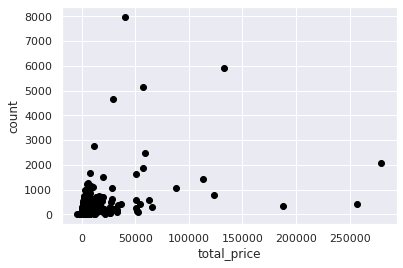

In [110]:
X = rfm[["total_price","count","recency"]]
#Visualise data points
plt.scatter(X["total_price"],X["count"],c='black')
plt.xlabel('total_price')
plt.ylabel('count')
plt.show()

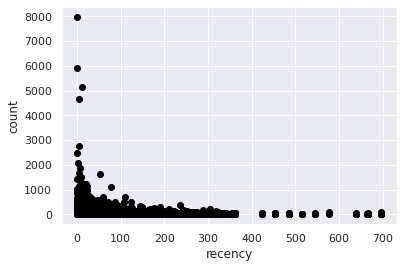

In [111]:
X = rfm[["total_price","count","recency"]]
#Visualise data points
plt.scatter(X["recency"],X["count"],c='black')
plt.xlabel('recency')
plt.ylabel('count')
plt.show()

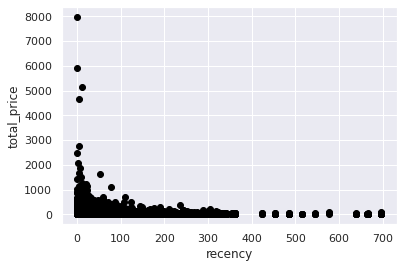

In [112]:
X = rfm[["total_price","count","recency"]]
#Visualise data points
plt.scatter(X["recency"],X["count"],c='black')
plt.xlabel('recency')
plt.ylabel('total_price')
plt.show()

### 
There are many outliers in the variables

## Running a base model

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

###### Standardisation of variables

In [114]:
rfm_copy = rfm[['total_price','count','recency']]
scaler = StandardScaler()


rfm_scaled = scaler.fit_transform(rfm_copy)
rfm_scaled.shape

(4372, 3)

In [115]:
rfm_scaled

array([[-0.23100099, -0.3917197 ,  1.97560006],
       [ 0.29343167,  0.38265697, -0.53502522],
       [-0.01231622, -0.26695902, -0.21900246],
       ...,
       [-0.20951263, -0.34439668, -0.06976949],
       [ 0.02390005,  2.85205812, -0.79837752],
       [-0.00744423, -0.0991774 , -0.88616162]])

In [116]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['total_price','count','recency']
rfm_scaled.head()

,total_price,count,recency
0,-0.231001,-0.391720,1.975600
1,0.293432,0.382657,-0.535025
2,-0.012316,-0.266959,-0.219002
3,-0.017146,-0.086271,-0.719372
4,-0.190312,-0.327188,1.843924


In [117]:
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3)

In [118]:
kmeans.inertia_

5909.380604627172

###### 
Base model has yeiled an interia of 6k, which isn't optimal.
Let's improve on this

# Removing Outliers

In [119]:
rfm

,CustomerID,total_price,count,recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311
...,...,...,...,...
4367,18280.0,180.60,10,160
4368,18281.0,80.82,7,4
4369,18282.0,176.60,13,93
4370,18283.0,2094.88,756,10


In [120]:
def iqr_outliers(df, field):
    q1 = df[field].quantile(0.25)
    q3 = df[field].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    
    df = df[(df[field] >= lower_tail) & (df[field] <= upper_tail)]    
    return df

rfm.head()

rfm_copy = iqr_outliers(rfm, 'total_price')
rfm_copy = iqr_outliers(rfm_copy, 'count')
rfm_copy = iqr_outliers(rfm_copy, 'recency')

#rfm_copy.head()

In [121]:
rfm_copy

,CustomerID,total_price,count,recency
0,12346.0,0.00,2,326
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311
5,12352.0,1545.41,95,73
...,...,...,...,...
4366,18278.0,173.90,9,74
4367,18280.0,180.60,10,160
4368,18281.0,80.82,7,4
4369,18282.0,176.60,13,93


In [122]:
print(rfm.shape)
print(rfm_copy.shape)

(4372, 4)
(3616, 4)


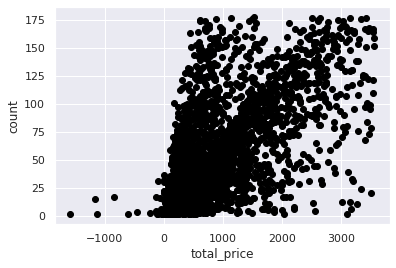

In [123]:
X = rfm_copy[["total_price","count","recency"]]
#Visualise data points
plt.scatter(X["total_price"],X["count"],c='black')
plt.xlabel('total_price')
plt.ylabel('count')
plt.show()

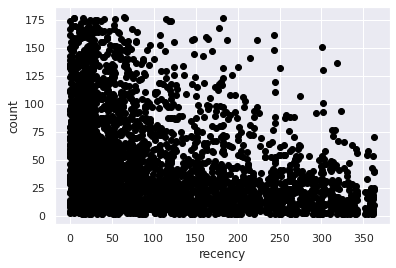

In [124]:
X = rfm_copy[["total_price","count","recency"]]
#Visualise data points
plt.scatter(X["recency"],X["count"],c='black')
plt.xlabel('recency')
plt.ylabel('count')
plt.show()

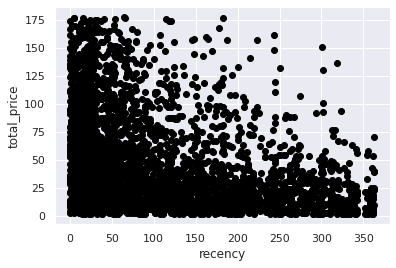

In [125]:
X = rfm_copy[["total_price","count","recency"]]
#Visualise data points
plt.scatter(X["recency"],X["count"],c='black')
plt.xlabel('recency')
plt.ylabel('total_price')
plt.show()

# Creating a RFM model

In [126]:
rfm_copy["recency_score"] = pd.qcut(rfm_copy["recency"],q=5,labels=[5,4,3,2,1])
rfm_copy["frequency_score"] = pd.qcut(rfm_copy["count"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_copy["monetary_score"] = pd.qcut(rfm_copy["total_price"],5,labels=[1,2,3,4,5])

In [127]:
rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score
0,12346.0,0.00,2,326,1,1,1
2,12348.0,1797.24,31,76,3,3,5
3,12349.0,1757.55,73,19,5,4,5
4,12350.0,334.40,17,311,1,2,2
5,12352.0,1545.41,95,73,3,5,5
...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,74,3,1,1
4367,18280.0,180.60,10,160,2,1,1
4368,18281.0,80.82,7,4,5,1,1
4369,18282.0,176.60,13,93,3,2,1


In [128]:
rfm_copy["RFM_SCORE"] = (rfm_copy["recency_score"].astype(str) + rfm_copy["frequency_score"].astype(str)) 

In [129]:
rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346.0,0.00,2,326,1,1,1,11
2,12348.0,1797.24,31,76,3,3,5,33
3,12349.0,1757.55,73,19,5,4,5,54
4,12350.0,334.40,17,311,1,2,2,12
5,12352.0,1545.41,95,73,3,5,5,35
...,...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,74,3,1,1,31
4367,18280.0,180.60,10,160,2,1,1,21
4368,18281.0,80.82,7,4,5,1,1,51
4369,18282.0,176.60,13,93,3,2,1,32


In [130]:
rfm_copy1 = rfm_copy[['total_price','count','recency']]
scaler = StandardScaler()


rfm_scaled = scaler.fit_transform(rfm_copy1)
rfm_scaled.shape

rfm_scaled

array([[-1.0557058 , -1.08205673,  2.33176413],
       [ 1.36528882, -0.38875763, -0.28560604],
       [ 1.31182391,  0.61533072, -0.88236644],
       ...,
       [-0.9468362 , -0.9625224 , -1.03940866],
       [-0.81781456, -0.81908121, -0.10762487],
       [ 1.41922521,  0.54361012, -1.08128658]])

In [131]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['total_price','count','recency']
rfm_scaled.head()

,total_price,count,recency
0,-1.055706,-1.082057,2.331764
1,1.365289,-0.388758,-0.285606
2,1.311824,0.615331,-0.882366
3,-0.605248,-0.723454,2.174722
4,1.026058,1.141282,-0.317014


Text(0, 0.5, 'Inertia')

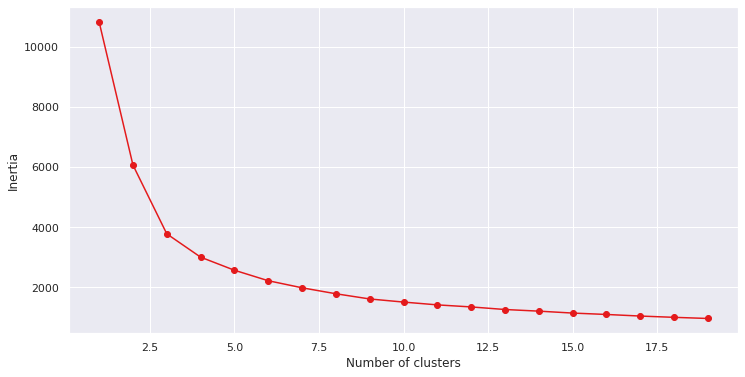

In [120]:
#fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(rfm_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [132]:
from sklearn.metrics import silhouette_score

for num_clusters in range(2,11):
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=80)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4280969448411302
For n_clusters=3, the silhouette score is 0.4216333164713893
For n_clusters=4, the silhouette score is 0.39085082836466656
For n_clusters=5, the silhouette score is 0.37526093591236076
For n_clusters=6, the silhouette score is 0.34295004652408095
For n_clusters=7, the silhouette score is 0.328869097380876
For n_clusters=8, the silhouette score is 0.3427708282294444
For n_clusters=9, the silhouette score is 0.3479060284226827
For n_clusters=10, the silhouette score is 0.3182574527621582


In [133]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++',max_iter=80)
kmeans.fit(rfm_scaled)
pred = kmeans.predict(rfm_scaled)

In [134]:
kmeans.inertia_

3788.4408467238063

In [135]:
frame = pd.DataFrame(rfm_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1847
1     992
2     777
Name: cluster, dtype: int64

In [136]:
rfm_copy['Cluster_ID'] = kmeans.labels_

rfm_copy.head()

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID
0,12346.0,0.00,2,326,1,1,1,11,1
2,12348.0,1797.24,31,76,3,3,5,33,0
3,12349.0,1757.55,73,19,5,4,5,54,2
4,12350.0,334.40,17,311,1,2,2,12,1
5,12352.0,1545.41,95,73,3,5,5,35,2


<Figure size 720x576 with 0 Axes>

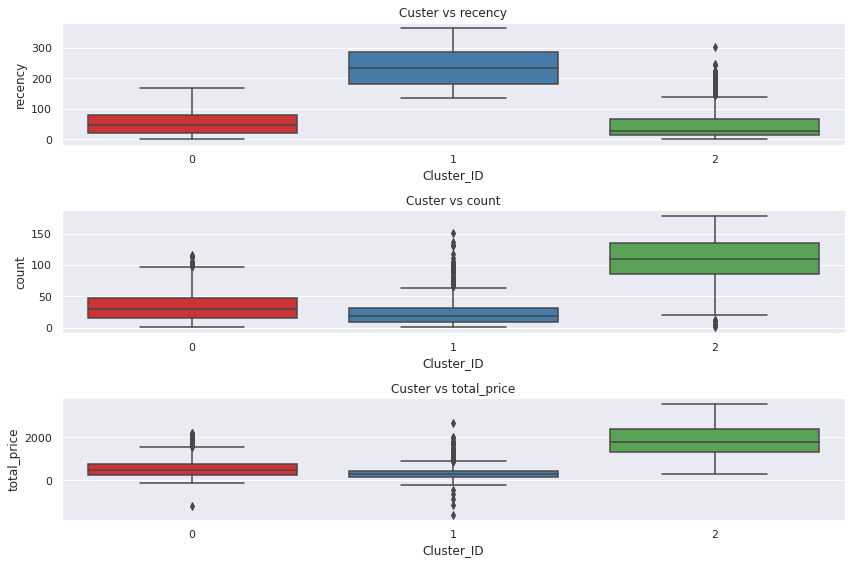

In [138]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,8))


sns.boxplot(x='Cluster_ID', y='recency', data=rfm_copy,ax=ax[0])
ax[0].set_title('Custer vs recency')


sns.boxplot(x='Cluster_ID', y='count', data=rfm_copy,ax=ax[1])
ax[1].set_title('Custer vs count')

sns.boxplot(x='Cluster_ID', y='total_price', data=rfm_copy,ax=ax[2])
ax[2].set_title('Custer vs total_price')


plt.tight_layout()


In [139]:
rfm_copy['sum_RFM'] = rfm_copy[['recency_score','frequency_score','monetary_score']].sum(axis=1)

rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
0,12346.0,0.00,2,326,1,1,1,11,1,3
2,12348.0,1797.24,31,76,3,3,5,33,0,11
3,12349.0,1757.55,73,19,5,4,5,54,2,14
4,12350.0,334.40,17,311,1,2,2,12,1,5
5,12352.0,1545.41,95,73,3,5,5,35,2,13
...,...,...,...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,74,3,1,1,31,0,5
4367,18280.0,180.60,10,160,2,1,1,21,1,4
4368,18281.0,80.82,7,4,5,1,1,51,0,7
4369,18282.0,176.60,13,93,3,2,1,32,0,6


In [140]:
pd.crosstab(rfm_copy['Cluster_ID'],rfm_copy['sum_RFM'])

sum_RFM,3,4,5,6,7,8,9,10,11,12,13,14,15
Cluster_ID,,,,,,,,,,,,,
0,0,35,94,158,247,226,253,268,235,196,119,16,0
1,191,166,184,146,132,79,64,29,1,0,0,0,0
2,0,0,0,0,1,3,3,17,61,117,193,206,176


In [141]:
rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
0,12346.0,0.00,2,326,1,1,1,11,1,3
2,12348.0,1797.24,31,76,3,3,5,33,0,11
3,12349.0,1757.55,73,19,5,4,5,54,2,14
4,12350.0,334.40,17,311,1,2,2,12,1,5
5,12352.0,1545.41,95,73,3,5,5,35,2,13
...,...,...,...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,74,3,1,1,31,0,5
4367,18280.0,180.60,10,160,2,1,1,21,1,4
4368,18281.0,80.82,7,4,5,1,1,51,0,7
4369,18282.0,176.60,13,93,3,2,1,32,0,6


In [142]:
rfm_copy.groupby(['sum_RFM','Cluster_ID'],as_index=False)['CustomerID'].nunique()

,sum_RFM,Cluster_ID,CustomerID
0,3,1,191
1,4,0,35
2,4,1,166
3,5,0,94
4,5,1,184
5,6,0,158
6,6,1,146
7,7,0,247
8,7,1,132
9,7,2,1


In [143]:
rfm_copy.groupby("Cluster_ID").CustomerID.count()

Cluster_ID
0    1847
1     992
2     777
Name: CustomerID, dtype: int64

In [144]:
rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
0,12346.0,0.00,2,326,1,1,1,11,1,3
2,12348.0,1797.24,31,76,3,3,5,33,0,11
3,12349.0,1757.55,73,19,5,4,5,54,2,14
4,12350.0,334.40,17,311,1,2,2,12,1,5
5,12352.0,1545.41,95,73,3,5,5,35,2,13
...,...,...,...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,74,3,1,1,31,0,5
4367,18280.0,180.60,10,160,2,1,1,21,1,4
4368,18281.0,80.82,7,4,5,1,1,51,0,7
4369,18282.0,176.60,13,93,3,2,1,32,0,6


In [145]:
Clusters_Recency= pd.DataFrame(rfm_copy.groupby("Cluster_ID").recency.median())
Clusters_Recency

,recency
Cluster_ID,
0,47.0
1,234.5
2,29.0


#### cluster 2 are recent visitors, followed by cluster 1

In [146]:
Clusters_Frequency= pd.DataFrame(rfm_copy.groupby("Cluster_ID")['count'].median())
Clusters_Frequency

,count
Cluster_ID,
0,29
1,18
2,109


#### Again here, cluster 2 are most frequent visitors. followed by 1

In [147]:
Clusters_Monetary= pd.DataFrame(rfm_copy.groupby("Cluster_ID").total_price.median())
Clusters_Monetary

,total_price
Cluster_ID,
0,472.120
1,283.495
2,1786.790


##### CLuster 2 again have the highest Monetary value out of the rest two clusters. 

In [148]:
cluster_1= rfm_copy[rfm_copy["Cluster_ID"]==1]
cluster_2= rfm_copy[rfm_copy["Cluster_ID"]==2]
cluster_3= rfm_copy[rfm_copy["Cluster_ID"]==3]
cluster_1.head(10)

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
0,12346.0,0.00,2,326,1,1,1,11,1,3
4,12350.0,334.40,17,311,1,2,2,12,1,5
6,12353.0,89.00,4,204,1,1,1,11,1,3
7,12354.0,1079.40,58,233,1,4,4,14,1,9
14,12361.0,189.90,10,288,1,1,1,11,1,3
18,12365.0,320.69,23,292,1,2,2,12,1,5
19,12367.0,168.90,11,212,1,1,1,11,1,3
23,12373.0,364.60,14,342,1,2,2,12,1,5
26,12377.0,1628.12,77,316,1,4,5,14,1,10
33,12386.0,401.90,10,192,1,1,3,11,1,5


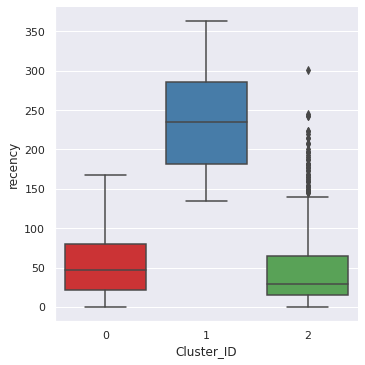

In [149]:
sns.catplot(x="Cluster_ID", y="recency", data= rfm_copy, kind="box")

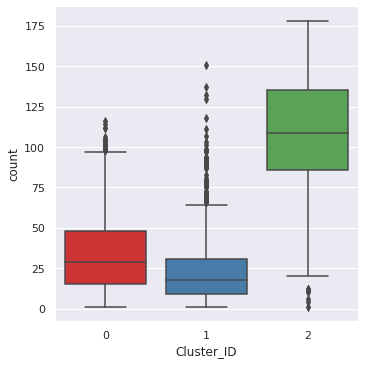

In [150]:
sns.catplot(x="Cluster_ID", y="count", data= rfm_copy, kind="box")

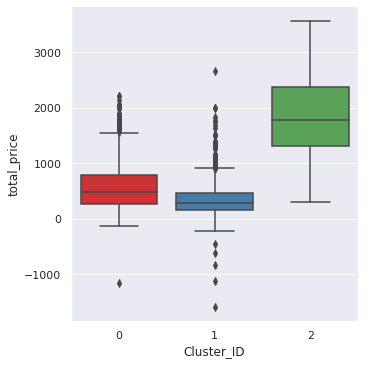

In [151]:
sns.catplot(x="Cluster_ID", y="total_price", data= rfm_copy, kind="box")

# Final Model

### There are still negative values, and as we know 91% of data is from UK, lets take only those into account

In [152]:
df = df[~df['InvoiceNo'].isin(cancelled)]

In [153]:
df = df[df['Country'] == 'United Kingdom']

In [154]:
df['Quantity'].describe()

count    487622.000000
mean          9.283548
std         166.142019
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [155]:
df.shape

(487622, 18)

In [156]:
df = df[df['Quantity']>0]

In [157]:
df.shape

(486286, 18)

In [158]:
df['total_price'].describe()

count    486286.000000
mean         18.513998
std         281.842405
min      -11062.060000
25%           3.360000
50%           8.400000
75%          16.950000
max      168469.600000
Name: total_price, dtype: float64

In [159]:
df = df[df['UnitPrice'] >= 0]

In [160]:
df['total_price'].describe()

count    486284.000000
mean         18.559570
std         280.945718
min           0.000000
25%           3.360000
50%           8.400000
75%          16.950000
max      168469.600000
Name: total_price, dtype: float64

In [161]:
fm = df.groupby(['CustomerID'],as_index=False).agg({'total_price':np.sum,'InvoiceDate':'count'})

In [162]:
maxdate = max(df['InvoiceDate'])
maxdate

Timestamp('2011-12-10 17:19:00')

In [163]:
df['recency'] = (maxdate - df['InvoiceDate']).dt.days

In [164]:
r = df.groupby(['CustomerID'],as_index=False)['recency'].min()

In [165]:
r

,CustomerID,recency
0,12346.0,326
1,12747.0,23
2,12748.0,4
3,12749.0,23
4,12820.0,45
...,...,...
3916,18280.0,160
3917,18281.0,4
3918,18282.0,216
3919,18283.0,10


In [166]:
fm

,CustomerID,total_price,InvoiceDate
0,12346.0,77183.60,1
1,12747.0,4196.01,103
2,12748.0,33719.73,4596
3,12749.0,4090.88,199
4,12820.0,942.34,59
...,...,...,...
3916,18280.0,180.60,10
3917,18281.0,80.82,7
3918,18282.0,178.05,12
3919,18283.0,2094.88,756


In [167]:
rfm = fm.merge(r,on='CustomerID',how='inner')
rfm

,CustomerID,total_price,InvoiceDate,recency
0,12346.0,77183.60,1,326
1,12747.0,4196.01,103,23
2,12748.0,33719.73,4596,4
3,12749.0,4090.88,199,23
4,12820.0,942.34,59,45
...,...,...,...,...
3916,18280.0,180.60,10,160
3917,18281.0,80.82,7,4
3918,18282.0,178.05,12,216
3919,18283.0,2094.88,756,10


In [168]:
rfm = rfm.rename(columns={'InvoiceDate':'count'})

In [169]:
rfm.head()

,CustomerID,total_price,count,recency
0,12346.0,77183.60,1,326
1,12747.0,4196.01,103,23
2,12748.0,33719.73,4596,4
3,12749.0,4090.88,199,23
4,12820.0,942.34,59,45


In [170]:
rfm['total_price'].describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: total_price, dtype: float64

# Removing Outliers

In [174]:
rfm

,CustomerID,total_price,count,recency
0,12346.0,77183.60,1,326
1,12747.0,4196.01,103,23
2,12748.0,33719.73,4596,4
3,12749.0,4090.88,199,23
4,12820.0,942.34,59,45
...,...,...,...,...
3916,18280.0,180.60,10,160
3917,18281.0,80.82,7,4
3918,18282.0,178.05,12,216
3919,18283.0,2094.88,756,10


In [175]:
def iqr_outliers(df, field):
    q1 = df[field].quantile(0.25)
    q3 = df[field].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    
    df = df[(df[field] >= lower_tail) & (df[field] <= upper_tail)]    
    return df

rfm.head()

rfm_copy = iqr_outliers(rfm, 'total_price')
rfm_copy = iqr_outliers(rfm_copy, 'count')
rfm_copy = iqr_outliers(rfm_copy, 'recency')

#rfm_copy.head()

In [176]:
rfm_copy

,CustomerID,total_price,count,recency
4,12820.0,942.34,59,45
5,12821.0,92.72,6,96
6,12822.0,948.88,46,71
7,12823.0,1759.50,5,75
8,12824.0,397.12,25,30
...,...,...,...,...
3915,18278.0,173.90,9,74
3916,18280.0,180.60,10,160
3917,18281.0,80.82,7,4
3918,18282.0,178.05,12,216


In [181]:
rfm_copy["recency_score"] = pd.qcut(rfm_copy["recency"],q=3,labels=[3,2,1])
rfm_copy["frequency_score"] = pd.qcut(rfm_copy["count"].rank(method="first"),3,labels=[1,2,3])
rfm_copy["monetary_score"] = pd.qcut(rfm_copy["total_price"],3,labels=[1,2,3])

In [182]:
rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score
4,12820.0,942.34,59,45,2,3,3
5,12821.0,92.72,6,96,2,1,1
6,12822.0,948.88,46,71,2,2,3
7,12823.0,1759.50,5,75,2,1,3
8,12824.0,397.12,25,30,3,2,2
...,...,...,...,...,...,...,...
3915,18278.0,173.90,9,74,2,1,1
3916,18280.0,180.60,10,160,1,1,1
3917,18281.0,80.82,7,4,3,1,1
3918,18282.0,178.05,12,216,1,1,1


In [183]:
rfm_copy["RFM_SCORE"] = (rfm_copy["recency_score"].astype(str) + rfm_copy["frequency_score"].astype(str) + rfm_copy["frequency_score"].astype(str)) 

In [185]:
rfm_copy['RFM_SCORE'].unique()

array(['233', '211', '222', '322', '111', '122', '333', '133', '311'],
      dtype=object)

In [186]:
rfm_copy1 = rfm_copy[['total_price','count','recency']]
scaler = StandardScaler()


rfm_scaled = scaler.fit_transform(rfm_copy1)
rfm_scaled.shape

rfm_scaled

array([[ 0.23730817,  0.31034052, -0.65329305],
       [-0.95300407, -0.97912461, -0.12673408],
       [ 0.24647067, -0.00594338, -0.38485122],
       ...,
       [-0.9696759 , -0.95479508, -1.07660516],
       [-0.83345728, -0.83314742,  1.1122282 ],
       [ 1.49111344,  0.57796536, -1.1179039 ]])

In [187]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['total_price','count','recency']
rfm_scaled.head()

,total_price,count,recency
0,0.237308,0.310341,-0.653293
1,-0.953004,-0.979125,-0.126734
2,0.246471,-0.005943,-0.384851
3,1.382144,-1.003454,-0.343552
4,-0.526542,-0.516864,-0.808163


Text(0, 0.5, 'Inertia')

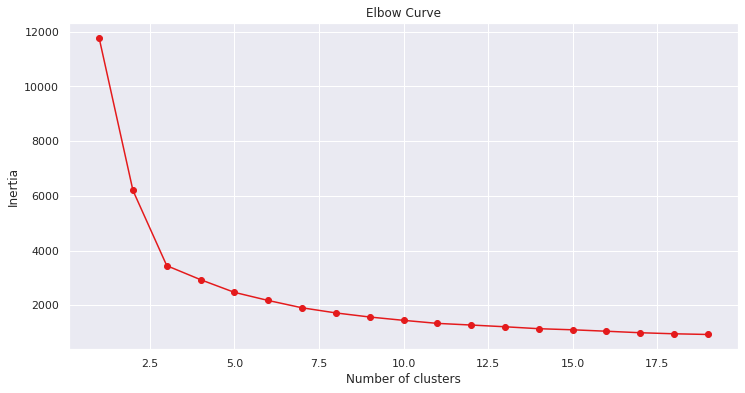

In [207]:
#fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(rfm_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [176]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=80)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4287764131460784
For n_clusters=3, the silhouette score is 0.41413031159046226
For n_clusters=4, the silhouette score is 0.3871205025369951
For n_clusters=5, the silhouette score is 0.3888837686415816
For n_clusters=6, the silhouette score is 0.3460136895488406
For n_clusters=7, the silhouette score is 0.32605398083429576
For n_clusters=8, the silhouette score is 0.3404000086333414
For n_clusters=9, the silhouette score is 0.3471555290293506
For n_clusters=10, the silhouette score is 0.35056668466250585


In [188]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++',max_iter=80)
kmeans.fit(rfm_scaled)
pred = kmeans.predict(rfm_scaled)

In [189]:
kmeans.inertia_

3450.3912071839472

In [190]:
frame = pd.DataFrame(rfm_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    1580
1     946
0     712
Name: cluster, dtype: int64

In [191]:
rfm_copy['Cluster_ID'] = kmeans.labels_

rfm_copy.head()

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID
4,12820.0,942.34,59,45,2,3,3,233,2
5,12821.0,92.72,6,96,2,1,1,211,2
6,12822.0,948.88,46,71,2,2,3,222,2
7,12823.0,1759.50,5,75,2,1,3,211,2
8,12824.0,397.12,25,30,3,2,2,322,2


<Figure size 720x576 with 0 Axes>

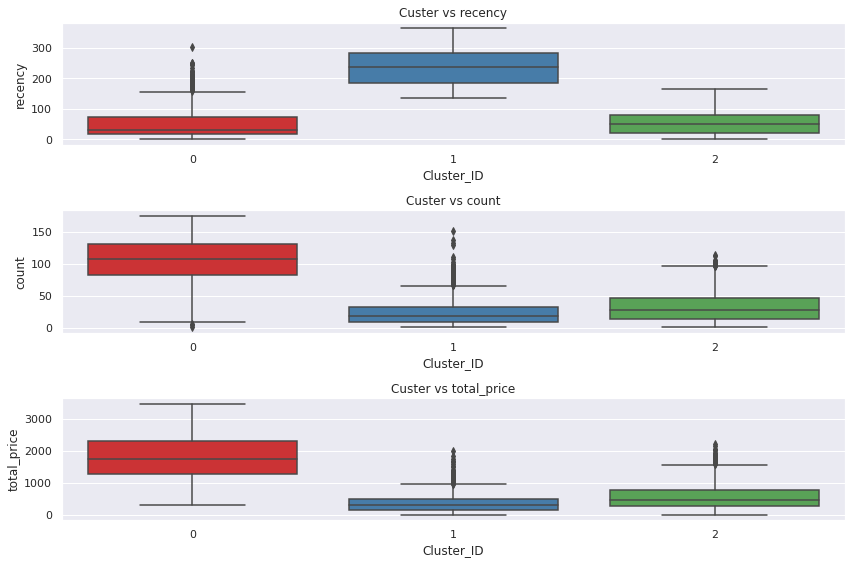

In [192]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,8))


sns.boxplot(x='Cluster_ID', y='recency', data=rfm_copy,ax=ax[0])
ax[0].set_title('Custer vs recency')


sns.boxplot(x='Cluster_ID', y='count', data=rfm_copy,ax=ax[1])
ax[1].set_title('Custer vs count')

sns.boxplot(x='Cluster_ID', y='total_price', data=rfm_copy,ax=ax[2])
ax[2].set_title('Custer vs total_price')


plt.tight_layout()


In [193]:
rfm_copy.groupby("Cluster_ID").CustomerID.count()

Cluster_ID
0     712
1     946
2    1580
Name: CustomerID, dtype: int64

In [194]:
rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID
4,12820.0,942.34,59,45,2,3,3,233,2
5,12821.0,92.72,6,96,2,1,1,211,2
6,12822.0,948.88,46,71,2,2,3,222,2
7,12823.0,1759.50,5,75,2,1,3,211,2
8,12824.0,397.12,25,30,3,2,2,322,2
...,...,...,...,...,...,...,...,...,...
3915,18278.0,173.90,9,74,2,1,1,211,2
3916,18280.0,180.60,10,160,1,1,1,111,1
3917,18281.0,80.82,7,4,3,1,1,311,2
3918,18282.0,178.05,12,216,1,1,1,111,1


In [195]:
rfm_copy['sum_RFM'] = rfm_copy[['recency_score','frequency_score','monetary_score']].sum(axis=1)

rfm_copy

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
4,12820.0,942.34,59,45,2,3,3,233,2,8
5,12821.0,92.72,6,96,2,1,1,211,2,4
6,12822.0,948.88,46,71,2,2,3,222,2,7
7,12823.0,1759.50,5,75,2,1,3,211,2,6
8,12824.0,397.12,25,30,3,2,2,322,2,7
...,...,...,...,...,...,...,...,...,...,...
3915,18278.0,173.90,9,74,2,1,1,211,2,4
3916,18280.0,180.60,10,160,1,1,1,111,1,3
3917,18281.0,80.82,7,4,3,1,1,311,2,5
3918,18282.0,178.05,12,216,1,1,1,111,1,3


In [196]:
pd.crosstab(rfm_copy['Cluster_ID'],rfm_copy['sum_RFM'])

sum_RFM,3,4,5,6,7,8,9
Cluster_ID,,,,,,,
0,0,0,2,15,95,262,338
1,396,196,237,84,33,0,0
2,6,231,340,359,380,183,81


In [229]:
rfm_copy.groupby(['sum_RFM','RFM_SCORE'],as_index=False)['CustomerID'].nunique()

,sum_RFM,RFM_SCORE,CustomerID
0,3,111,402
1,4,111,90
2,4,122,119
3,4,211,218
4,5,111,25
5,5,122,217
6,5,133,25
7,5,211,93
8,5,222,70
9,5,311,149


In [197]:
Clusters_Recency= pd.DataFrame(rfm_copy.groupby("Cluster_ID").recency.median())
Clusters_Recency

,recency
Cluster_ID,
0,30.5
1,237.0
2,50.0


#### cluster 0 are recent visitors, followed by cluster 2

In [198]:
Clusters_Frequency= pd.DataFrame(rfm_copy.groupby("Cluster_ID")['count'].median())
Clusters_Frequency

,count
Cluster_ID,
0,107
1,19
2,28


#### Again here, cluster 0 are most frequent visitors.followed by 2

In [202]:
Clusters_Monetary= pd.DataFrame(rfm_copy.groupby("Cluster_ID").total_price.median())
Clusters_Monetary

,total_price
Cluster_ID,
0,1740.910
1,303.255
2,456.800


##### CLuster 0 again have the highest Monetary value out of the rest two clusters. 

In [203]:
cluster_1= rfm_copy[rfm_copy["Cluster_ID"]==1]
cluster_2= rfm_copy[rfm_copy["Cluster_ID"]==2]
cluster_3= rfm_copy[rfm_copy["Cluster_ID"]==3]
cluster_1.head(10)

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
12,12829.0,293.00,11,162,1,1,1,111,1,3
14,12831.0,215.05,9,263,1,1,1,111,1,3
15,12832.0,383.03,27,152,1,2,2,122,1,5
16,12833.0,417.38,24,146,1,2,2,122,1,5
17,12834.0,312.38,18,310,1,1,1,111,1,3
19,12837.0,134.10,12,174,1,1,1,111,1,3
27,12845.0,354.09,27,268,1,2,2,122,1,5
30,12851.0,135.18,50,245,1,2,1,122,1,4
31,12852.0,311.55,17,295,1,1,1,111,1,3
38,12864.0,147.12,3,139,1,1,1,111,1,3


Text(0.5, 1.0, 'Recency vs Clusters')

<Figure size 720x1440 with 0 Axes>

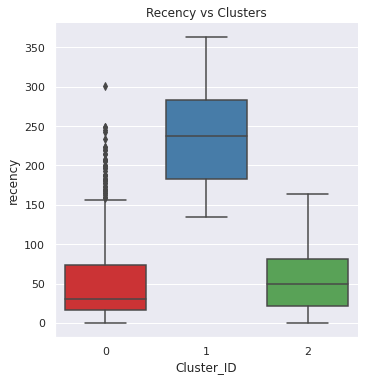

In [219]:
plt.figure(figsize=(10,20))
sns.catplot(x="Cluster_ID", y="recency", data= rfm_copy, kind="box")
plt.title('Recency vs Clusters')

Text(0.5, 1.0, 'Frequency vs Clusters')

<Figure size 720x1440 with 0 Axes>

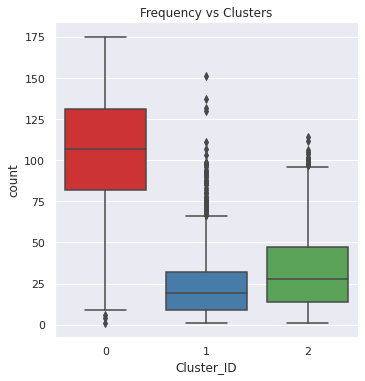

In [220]:
plt.figure(figsize=(10,20))
sns.catplot(x="Cluster_ID", y="count", data= rfm_copy, kind="box")
plt.title('Frequency vs Clusters')

Text(0.5, 1.0, 'Monetary value')

<Figure size 720x1440 with 0 Axes>

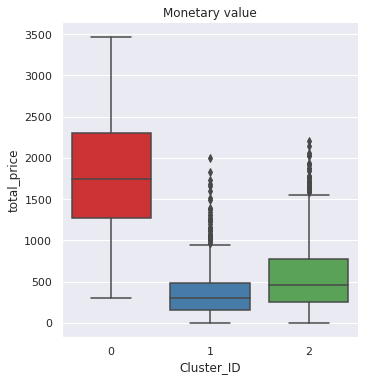

In [216]:
plt.figure(figsize=(10,20))
sns.catplot(x="Cluster_ID", y="total_price", data= rfm_copy, kind="box")
plt.title('Monetary value')

# Visualizing CLuster

In [193]:
rfm_scaled

,total_price,count,recency,cluster
0,0.237308,0.310341,-0.653293,2
1,-0.953004,-0.979125,-0.126734,2
2,0.246471,-0.005943,-0.384851,2
3,1.382144,-1.003454,-0.343552,2
4,-0.526542,-0.516864,-0.808163,2
...,...,...,...,...
3233,-0.839271,-0.906136,-0.353877,2
3234,-0.829885,-0.881806,0.534046,1
3235,-0.969676,-0.954795,-1.076605,2
3236,-0.833457,-0.833147,1.112228,1


In [208]:
rfm_sca = rfm_scaled.drop('cluster',axis=1)

In [209]:
from mpl_toolkits.mplot3d import Axes3D

In [210]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++',max_iter=80)
clusters = kmeans.fit_predict(rfm_sca)

rfm_sca['label'] = clusters

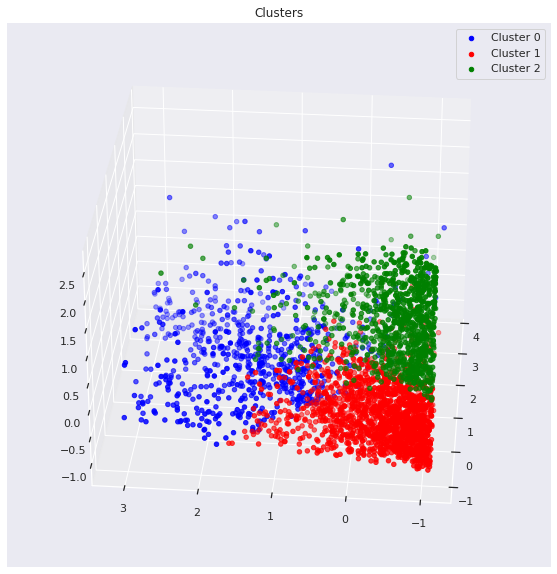

In [215]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_sca['total_price'][rfm_sca['label'] == 0],
           rfm_sca['count'][rfm_sca['label'] == 0],
           rfm_sca['recency'][rfm_sca['label'] == 0],
           c='blue',label='Cluster 0')
ax.scatter(rfm_sca['total_price'][rfm_sca['label'] == 1],
           rfm_sca['count'][rfm_sca['label'] == 1],
           rfm_sca['recency'][rfm_sca['label'] == 1],
           c='red',label = 'Cluster 1')
ax.scatter(rfm_sca['total_price'][rfm_sca['label'] == 2],
           rfm_sca['count'][rfm_sca['label'] == 2],
           rfm_sca['recency'][rfm_sca['label'] == 2],
           c='green',label='Cluster 2')

plt.title('Clusters')

plt.legend()

ax.view_init(30,185)

In [199]:
rfm_sca

,total_price,count,recency,label
0,0.237308,0.310341,-0.653293,0
1,-0.953004,-0.979125,-0.126734,0
2,0.246471,-0.005943,-0.384851,0
3,1.382144,-1.003454,-0.343552,0
4,-0.526542,-0.516864,-0.808163,0
...,...,...,...,...
3233,-0.839271,-0.906136,-0.353877,0
3234,-0.829885,-0.881806,0.534046,1
3235,-0.969676,-0.954795,-1.076605,0
3236,-0.833457,-0.833147,1.112228,1


# Cluster Inference - cluster 1

In [200]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1,0,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1,0,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.40,Tier 1,0,89
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.60,Tier 1,0,89
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,30.00,Tier 1,0,89
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,214.80,Tier 1,0,89


In [ ]:
cluster_1= rfm_copy[rfm_copy["Cluster_ID"]==1]
cluster_2= rfm_copy[rfm_copy["Cluster_ID"]==2]
cluster_3= rfm_copy[rfm_copy["Cluster_ID"]==0]
cluster_1.head(10)

In [201]:
overall = df.copy()

In [202]:
overall

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1,0,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1,0,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.40,Tier 1,0,89
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.60,Tier 1,0,89
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,30.00,Tier 1,0,89
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,214.80,Tier 1,0,89


In [208]:
df = overall[overall['CustomerID'].isin(cluster_1['CustomerID'])]

In [209]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-01-12 09:00:00,2.55,13748.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,204.00,Tier 1,0,697
183,536388,21754,HOME BUILDING BLOCK WORD,3,2010-01-12 09:59:00,5.95,16250.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,17.85,Tier 1,0,697
184,536388,21755,LOVE BUILDING BLOCK WORD,3,2010-01-12 09:59:00,5.95,16250.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,17.85,Tier 1,0,697
185,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,2010-01-12 09:59:00,7.95,16250.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,15.90,Tier 1,0,697
186,536388,21363,HOME SMALL WOOD LETTERS,3,2010-01-12 09:59:00,4.95,16250.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,14.85,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535218,581192,22031,BOTANICAL LAVENDER BIRTHDAY CARD,12,2011-07-12 17:05:00,0.42,15883.0,United Kingdom,0,Tuesday,July,2011,17,2011-July,5.04,Tier 1,0,151
535219,581192,23695,DOILY THANK YOU CARD,12,2011-07-12 17:05:00,0.42,15883.0,United Kingdom,0,Tuesday,July,2011,17,2011-July,5.04,Tier 1,0,151
535220,581192,22718,CARD CAT AND TREE,12,2011-07-12 17:05:00,0.42,15883.0,United Kingdom,0,Tuesday,July,2011,17,2011-July,5.04,Tier 1,0,151
535221,581192,21506,"FANCY FONT BIRTHDAY CARD,",12,2011-07-12 17:05:00,0.42,15883.0,United Kingdom,0,Tuesday,July,2011,17,2011-July,5.04,Tier 1,0,151


### Invoice No
Invoice number. Nominal, a 6-digit integral number uniquely assigned to 
each transaction. If this code starts with letter 'c', it indicates a cancellation

In [210]:
#InvoiceNo
df['InvoiceNo'].nunique()

1370

In [211]:
df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].nunique()

0

### Stock Code
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to 
each distinct product

In [212]:
df['StockCode'].nunique()

2935

### Description

In [213]:
df['Description'].nunique()

3005

In [214]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    151
REGENCY CAKESTAND 3 TIER              140
ASSORTED COLOUR BIRD ORNAMENT         107
PARTY BUNTING                         104
REX CASH+CARRY JUMBO SHOPPER          102
                                     ... 
LETTER "I" BLING KEY RING               1
VINTAGE WOODEN BAR STOOL                1
CREAM SWEETHEART LETTER RACK            1
MIRROR MOSAIC T-LIGHT HOLDER            1
PINK ROSEBUD PEARL BRACELET             1
Name: Description, Length: 3005, dtype: int64

### Quantity

In [217]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
    ax[1].set_title('Box plot of Age distribution')

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

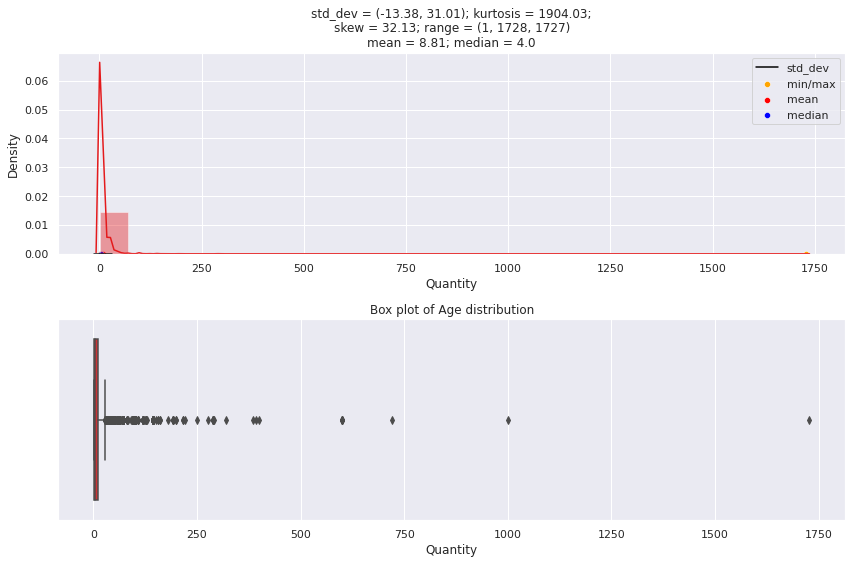

In [218]:
cont_univ(df['Quantity'])

<Figure size 720x576 with 0 Axes>

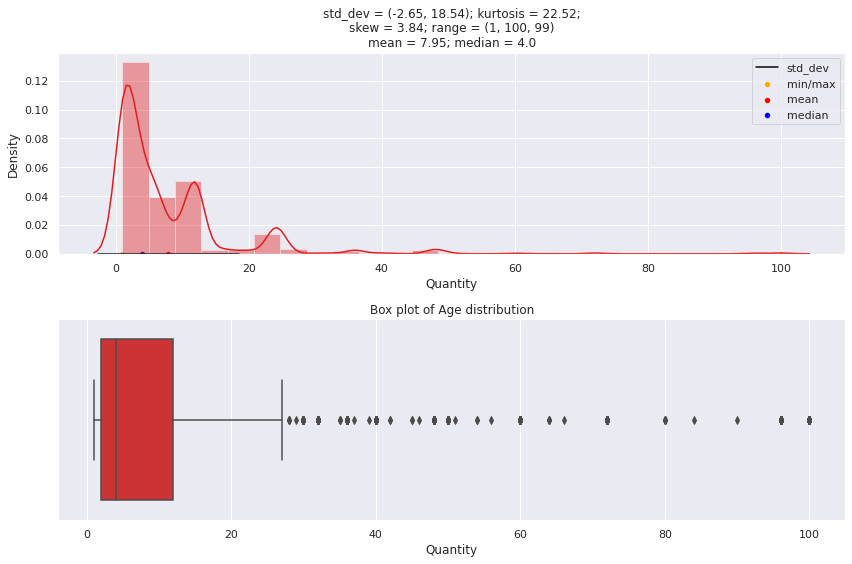

In [220]:
cont_univ(df[(df['Quantity'] > 0) & (df['Quantity'] <= 100)]['Quantity'])

### InvoiceDate

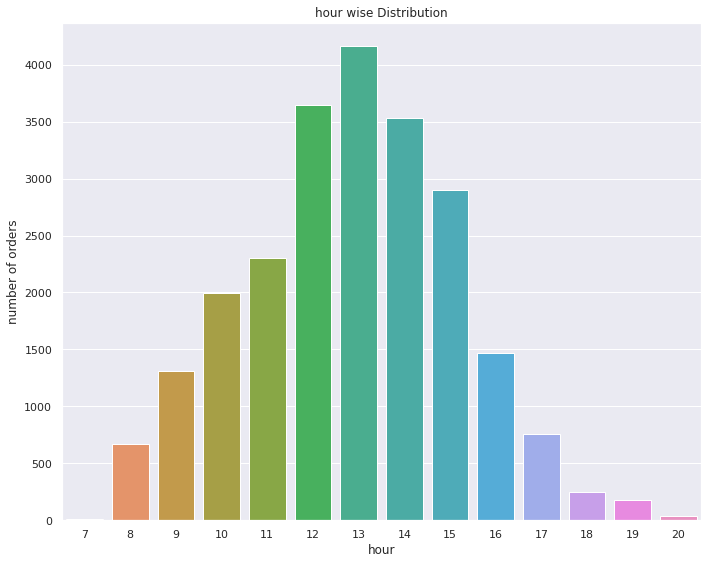

In [221]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['hour'])

plt.title('hour wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

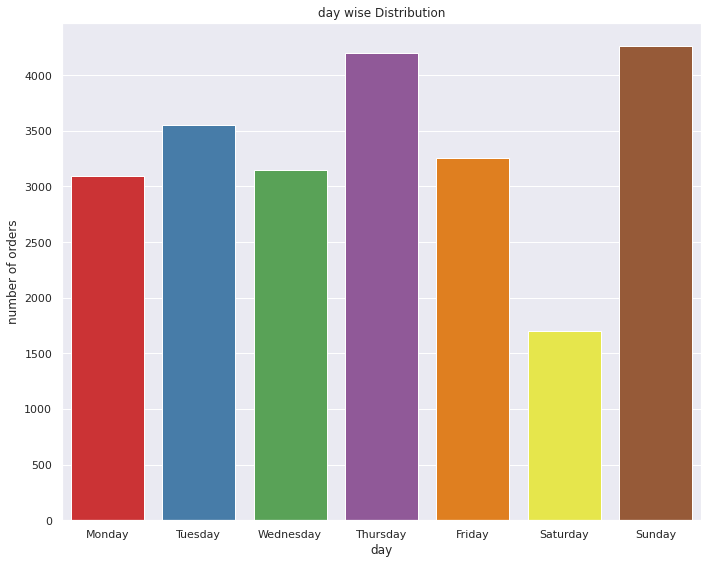

In [222]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['day'])

plt.title('day wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

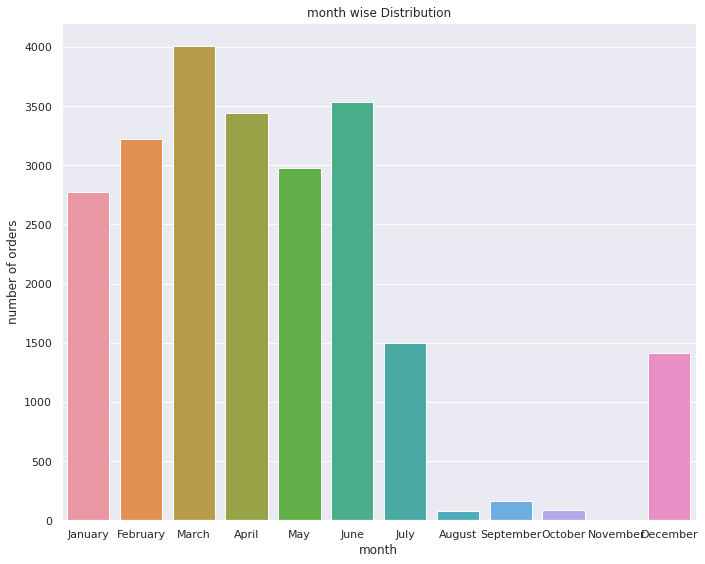

In [223]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['month'])

plt.title('month wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

Text(0, 0.5, 'number of orders')

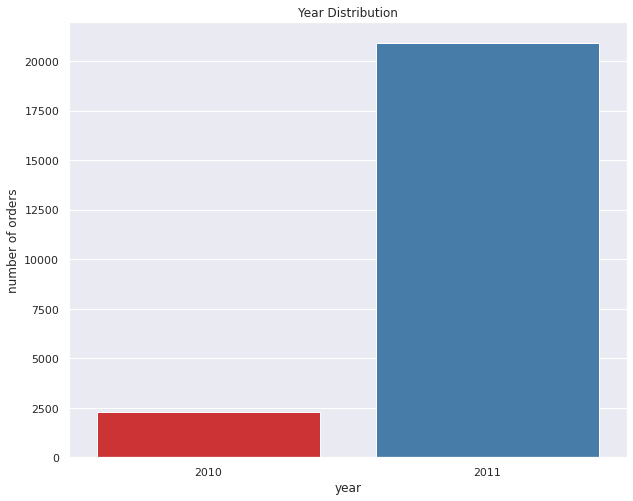

In [224]:
plt.figure(figsize=(10,8))

sns.countplot(df['year'])

plt.title('Year Distribution')
plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

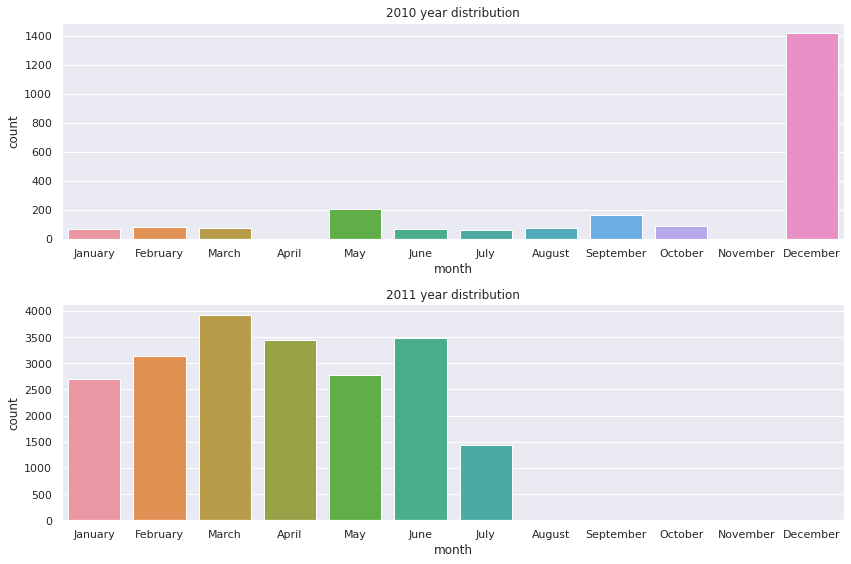

In [225]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[df['year'] == 2010]['month'],ax=ax[0])
ax[0].set_title('2010 year distribution')


sns.countplot(df[df['year'] == 2011]['month'],ax=ax[1])
ax[1].set_title('2011 year distribution')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

#### Not ordering any products in last 4 months

In [226]:
max(df['InvoiceDate'])

Timestamp('2011-07-29 15:12:00')

##### most of the order are placed in 2011, November is the highest month with more order.

can see a increasing trend in 2011

### UnitPrice

In [227]:
df['UnitPrice'].describe()

count    23206.000000
mean         3.221815
std          6.456834
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max        451.420000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

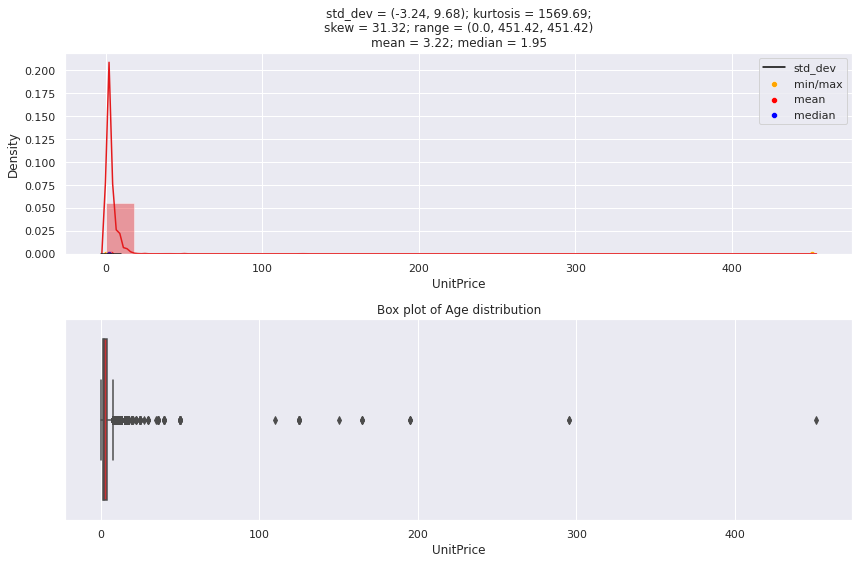

In [228]:
cont_univ(df['UnitPrice'])

In [229]:
df[df['UnitPrice'] <= df['UnitPrice'].quantile(.99)]['UnitPrice'].describe()

count    23020.000000
mean         2.936552
std          2.748761
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max         14.950000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

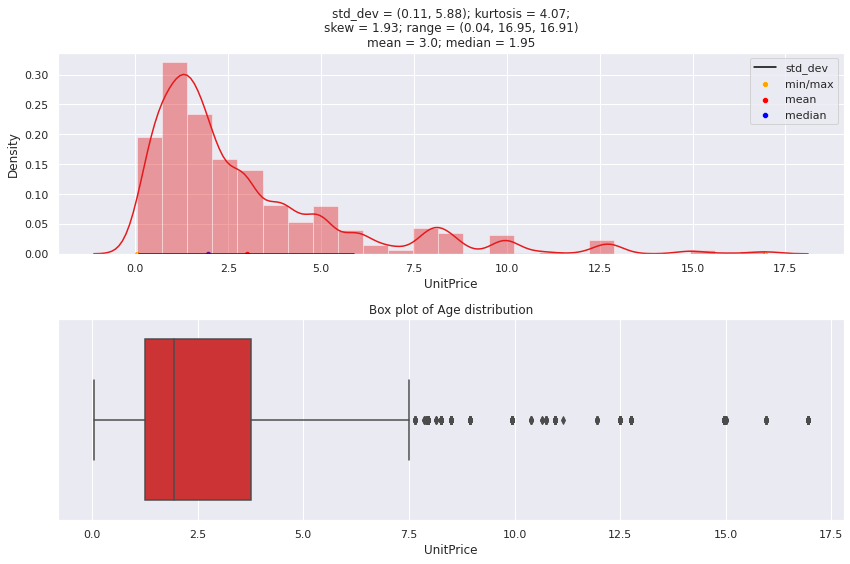

In [230]:
cont_univ(
    df[(df['UnitPrice'] > 0) & (df['UnitPrice'] <= 18) & (df['cancelled'] == 0)
       & (df['Description'] != 'Adjust bad debt')]['UnitPrice'])

### CustomerID

In [231]:
df['CustomerID'].nunique()

946

In [232]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
cancelled               int64
day                  category
month                category
year                    int64
hour                    int64
month_year             object
total_price           float64
Tier                   object
bad_debt                int64
recency                 int64
dtype: object

### Country

In [233]:
df['Country'].nunique()

1

In [234]:
round(df['Country'].value_counts(normalize=True)*100,1).apply(str) + "%"

United Kingdom    100.0%
Name: Country, dtype: object

# Cluster 2 

In [200]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1,0,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1,0,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.40,Tier 1,0,89
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.60,Tier 1,0,89
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,30.00,Tier 1,0,89
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,214.80,Tier 1,0,89


In [ ]:
cluster_1= rfm_copy[rfm_copy["Cluster_ID"]==1]
cluster_2= rfm_copy[rfm_copy["Cluster_ID"]==2]
cluster_3= rfm_copy[rfm_copy["Cluster_ID"]==3]
cluster_1.head(10)

In [201]:
overall = df.copy()

In [202]:
overall

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1,0,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1,0,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.40,Tier 1,0,89
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.60,Tier 1,0,89
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,30.00,Tier 1,0,89
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,214.80,Tier 1,0,89


In [235]:
df = overall[overall['CustomerID'].isin(cluster_2['CustomerID'])]

In [236]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-01-12 09:09:00,10.95,15100.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,350.40,Tier 1,0,697
168,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2010-01-12 09:56:00,19.95,17420.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,19.95,Tier 1,0,697
169,536385,22961,JAM MAKING SET PRINTED,12,2010-01-12 09:56:00,1.45,17420.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,17.40,Tier 1,0,697
170,536385,22960,JAM MAKING SET WITH JARS,6,2010-01-12 09:56:00,4.25,17420.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,25.50,Tier 1,0,697
171,536385,22663,JUMBO BAG DOLLY GIRL DESIGN,10,2010-01-12 09:56:00,1.95,17420.0,United Kingdom,0,Tuesday,January,2010,9,2010-January,19.50,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540076,581461,23281,FOLDING BUTTERFLY MIRROR RED,12,2011-08-12 18:51:00,0.83,13318.0,United Kingdom,0,Friday,August,2011,18,2011-August,9.96,Tier 1,0,119
540077,581461,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,2011-08-12 18:51:00,3.75,13318.0,United Kingdom,0,Friday,August,2011,18,2011-August,45.00,Tier 1,0,119
541542,581500,82486,3 DRAWER ANTIQUE WHITE WOOD CABINET,4,2011-09-12 10:45:00,8.95,15344.0,United Kingdom,0,Monday,September,2011,10,2011-September,35.80,Tier 1,0,89
541543,581500,85066,CREAM SWEETHEART MINI CHEST,4,2011-09-12 10:45:00,12.75,15344.0,United Kingdom,0,Monday,September,2011,10,2011-September,51.00,Tier 1,0,89


### Invoice No
Invoice number. Nominal, a 6-digit integral number uniquely assigned to 
each transaction. If this code starts with letter 'c', it indicates a cancellation

In [237]:
#InvoiceNo
df['InvoiceNo'].nunique()

3520

In [238]:
df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].nunique()

0

### Stock Code
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to 
each distinct product

In [239]:
df['StockCode'].nunique()

3071

### Description

In [240]:
df['Description'].nunique()

3170

In [241]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    304
ASSORTED COLOUR BIRD ORNAMENT         251
REGENCY CAKESTAND 3 TIER              251
PARTY BUNTING                         215
REX CASH+CARRY JUMBO SHOPPER          197
                                     ... 
RETROSPOT CANDLE  SMALL                 1
VINTAGE KITCHEN PRINT SEAFOOD           1
SET OF 2 TEA TOWELS PING MICROWAVE      1
CANDY SPOT HAND BAG                     1
BLACK SMALL GLASS CAKE STAND            1
Name: Description, Length: 3170, dtype: int64

### Quantity

In [242]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
    ax[1].set_title('Box plot of Age distribution')

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

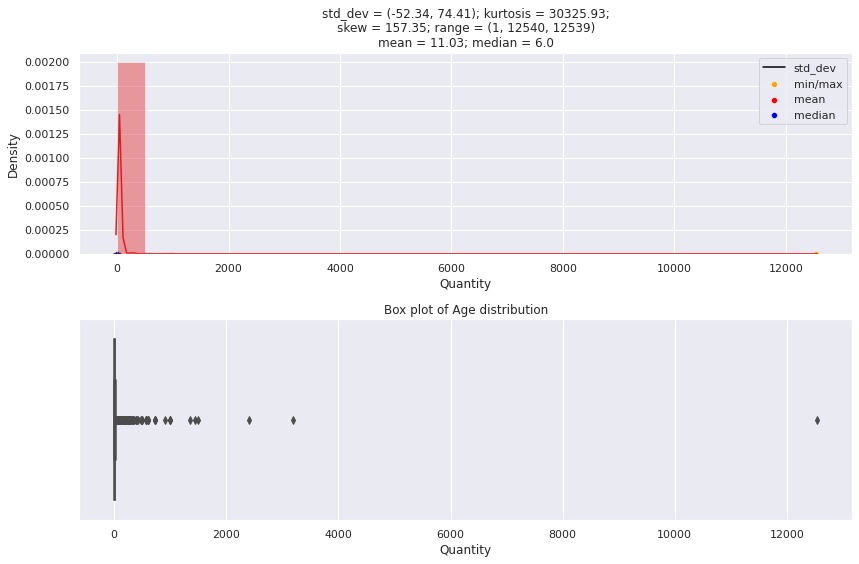

In [243]:
cont_univ(df['Quantity'])

##### Huge outliers can be seen in this variable

In [244]:
df[df['Quantity'] <= df['Quantity'].quantile(.99)]['Quantity'].describe()

count    50294.000000
mean         9.281863
std         11.318031
min          1.000000
25%          2.000000
50%          6.000000
75%         12.000000
max         96.000000
Name: Quantity, dtype: float64

##### we can see 99% quantile of the data, has the max orders of 100 and least is in negative( maybe be a cancelled order) 

<Figure size 720x576 with 0 Axes>

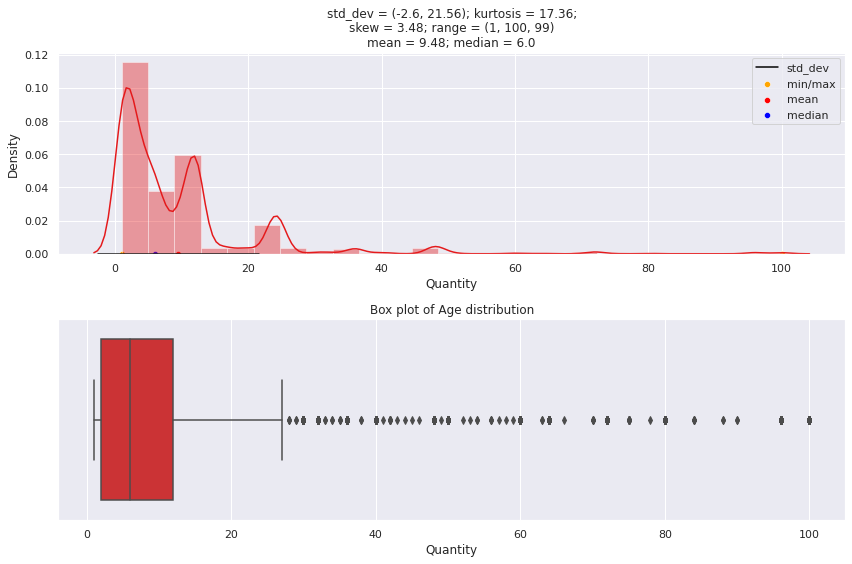

In [245]:
cont_univ(df[(df['Quantity'] > 0) & (df['Quantity'] <= 100)]['Quantity'])

### InvoiceDate

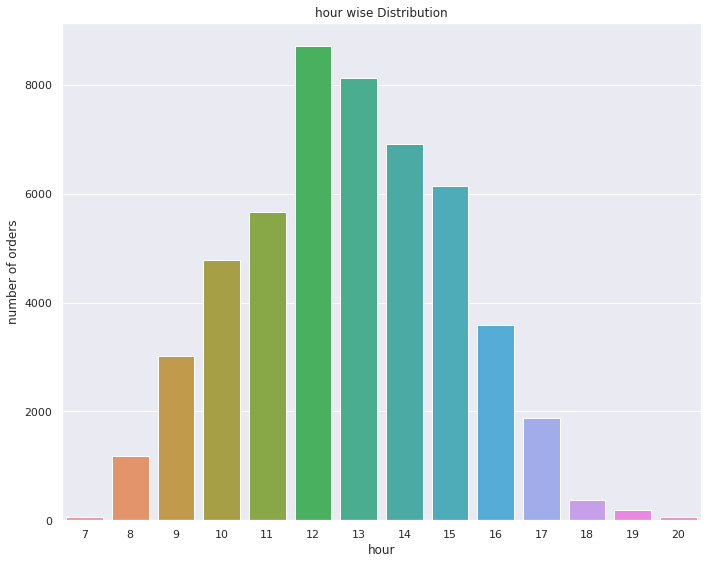

In [246]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['hour'])

plt.title('hour wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

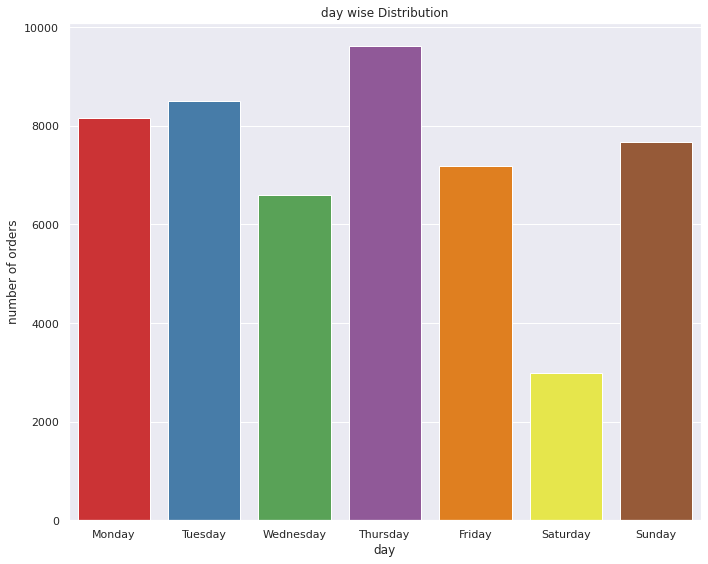

In [247]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['day'])

plt.title('day wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

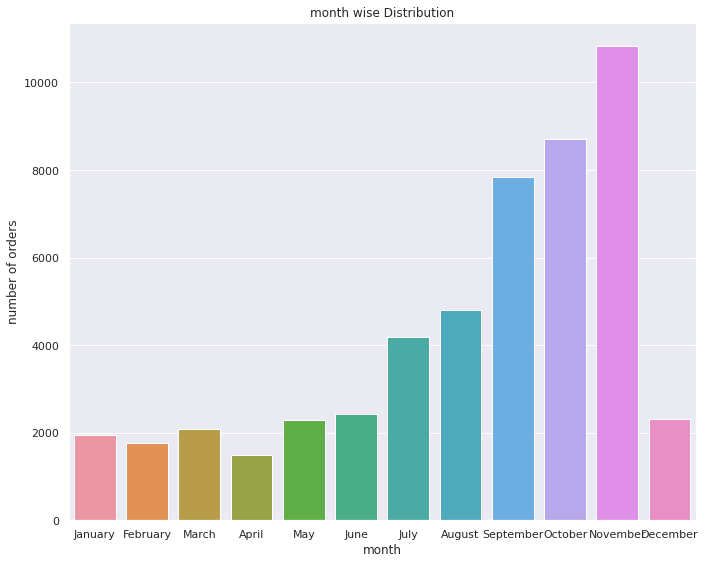

In [248]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['month'])

plt.title('month wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

Text(0, 0.5, 'number of orders')

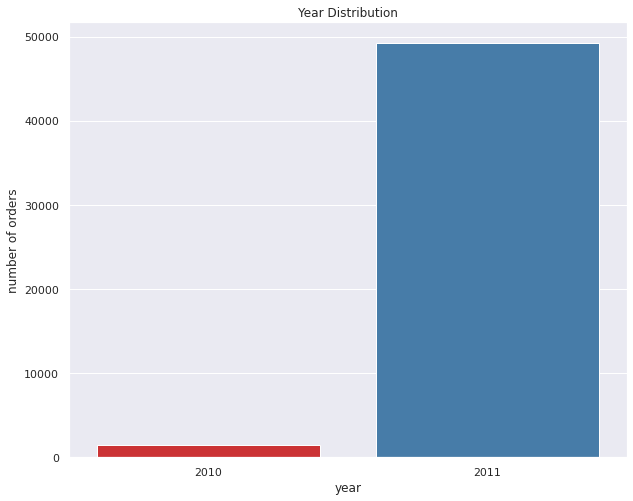

In [249]:
plt.figure(figsize=(10,8))

sns.countplot(df['year'])

plt.title('Year Distribution')
plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

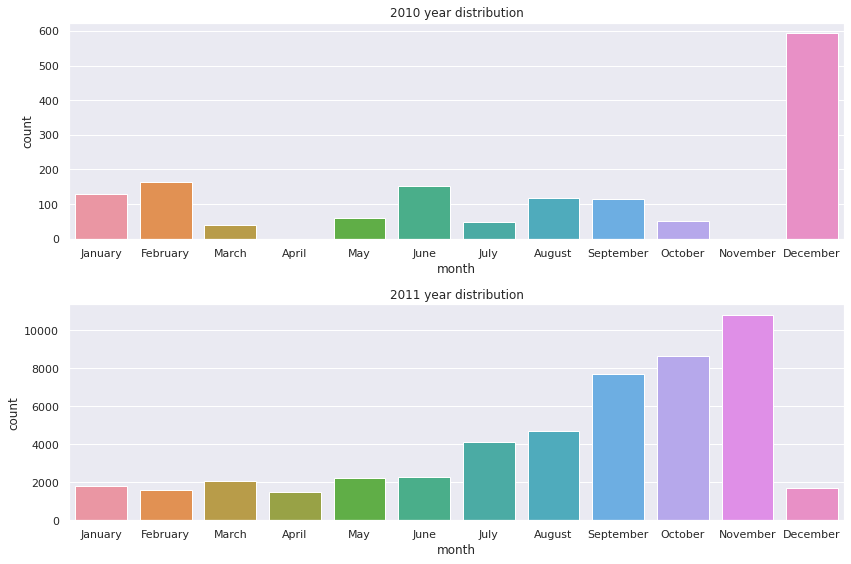

In [250]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[df['year'] == 2010]['month'],ax=ax[0])
ax[0].set_title('2010 year distribution')


sns.countplot(df[df['year'] == 2011]['month'],ax=ax[1])
ax[1].set_title('2011 year distribution')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

In [251]:
max(df['InvoiceDate'])

Timestamp('2011-12-10 15:49:00')

##### most of the order are placed in 2011, November is the highest month with more order.

can see a increasing trend in 2011

### UnitPrice

In [252]:
df['UnitPrice'].describe()

count    50692.000000
mean         3.089526
std         10.555865
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max       2033.100000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

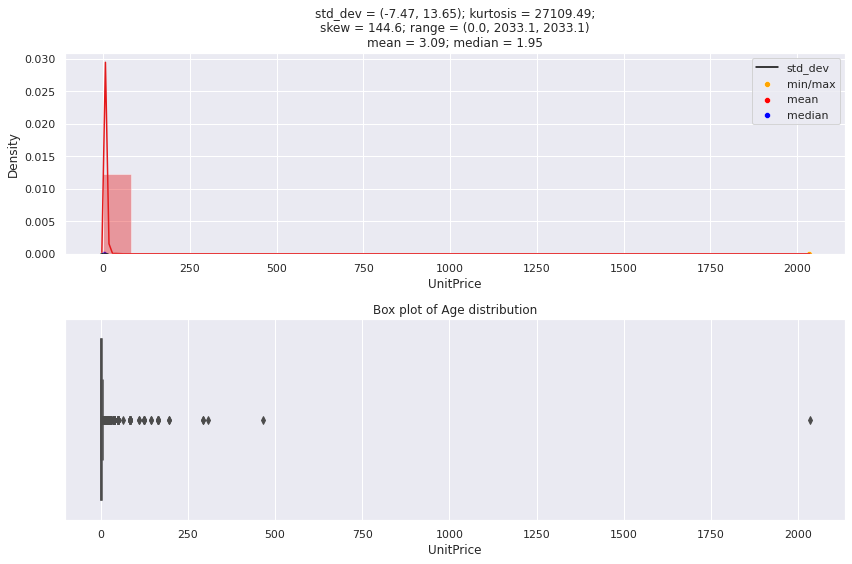

In [253]:
cont_univ(df['UnitPrice'])

In [254]:
df[df['UnitPrice'] <= df['UnitPrice'].quantile(.99)]['UnitPrice'].describe()

count    50281.000000
mean         2.798678
std          2.642994
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max         14.950000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

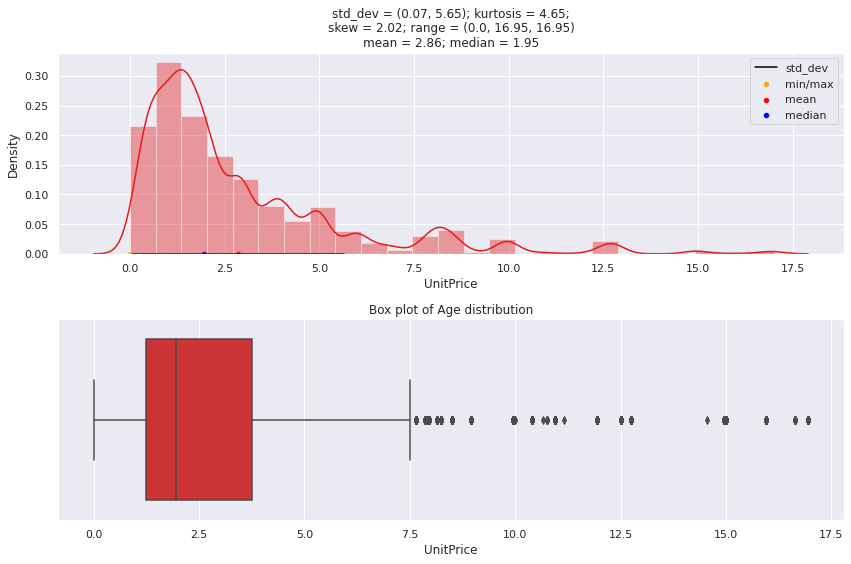

In [255]:
cont_univ(
    df[(df['UnitPrice'] > 0) & (df['UnitPrice'] <= 18) & (df['cancelled'] == 0)
       & (df['Description'] != 'Adjust bad debt')]['UnitPrice'])

### CustomerID

In [256]:
df['CustomerID'].nunique()

1580

In [257]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
cancelled               int64
day                  category
month                category
year                    int64
hour                    int64
month_year             object
total_price           float64
Tier                   object
bad_debt                int64
recency                 int64
dtype: object

### Country

In [258]:
df['Country'].nunique()

1

In [259]:
round(df['Country'].value_counts(normalize=True)*100,1).apply(str) + "%"

United Kingdom    100.0%
Name: Country, dtype: object

# Cluster 0

In [ ]:
cluster_1= rfm_copy[rfm_copy["Cluster_ID"]==1]
cluster_2= rfm_copy[rfm_copy["Cluster_ID"]==2]

In [222]:
cluster_3= rfm_copy[rfm_copy["Cluster_ID"]==0]
cluster_3.head(10)

,CustomerID,total_price,count,recency,recency_score,frequency_score,monetary_score,RFM_SCORE,Cluster_ID,sum_RFM
9,12826.0,1474.72,91,60,2,3,3,233,0,8
18,12836.0,2612.86,175,30,3,3,3,333,0,9
20,12838.0,683.13,123,182,1,3,2,133,0,6
22,12840.0,2726.77,113,65,2,3,3,233,0,8
25,12843.0,1702.26,103,66,2,3,3,233,0,8
28,12847.0,871.54,91,23,3,3,3,333,0,9
32,12853.0,1957.10,78,135,1,3,3,133,0,7
33,12854.0,1324.50,110,6,3,3,3,333,0,9
40,12868.0,1607.06,107,9,3,3,3,333,0,9
45,12877.0,1535.77,154,25,3,3,3,333,0,9


In [201]:
overall = df.copy()

In [262]:
overall

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,15.30,Tier 1,0,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,22.00,Tier 1,0,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,20.34,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.40,Tier 1,0,89
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,23.60,Tier 1,0,89
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,30.00,Tier 1,0,89
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,0,Monday,September,2011,12,2011-September,214.80,Tier 1,0,89


In [224]:
df = df[df['CustomerID'].isin(cluster_3['CustomerID'])]

In [225]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,day,month,year,hour,month_year,total_price,Tier,bad_debt,recency
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,54.08,Tier 1,0,697
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-01-12 08:34:00,2.10,13047.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,12.60,Tier 1,0,697
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-01-12 08:34:00,2.10,13047.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,12.60,Tier 1,0,697
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-01-12 08:34:00,3.75,13047.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,30.00,Tier 1,0,697
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-01-12 08:34:00,1.65,13047.0,United Kingdom,0,Tuesday,January,2010,8,2010-January,9.90,Tier 1,0,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541608,581514,22069,BROWN PIRATE TREASURE CHEST,20,2011-09-12 11:20:00,0.39,17754.0,United Kingdom,0,Monday,September,2011,11,2011-September,7.80,Tier 1,0,89
541609,581514,22068,BLACK PIRATE TREASURE CHEST,14,2011-09-12 11:20:00,0.39,17754.0,United Kingdom,0,Monday,September,2011,11,2011-September,5.46,Tier 1,0,89
541610,581514,22500,SET OF 2 TINS JARDIN DE PROVENCE,4,2011-09-12 11:20:00,1.25,17754.0,United Kingdom,0,Monday,September,2011,11,2011-September,5.00,Tier 1,0,89
541611,581514,22075,6 RIBBONS ELEGANT CHRISTMAS,24,2011-09-12 11:20:00,0.39,17754.0,United Kingdom,0,Monday,September,2011,11,2011-September,9.36,Tier 1,0,89


### Invoice No
Invoice number. Nominal, a 6-digit integral number uniquely assigned to 
each transaction. If this code starts with letter 'c', it indicates a cancellation

In [267]:
#InvoiceNo
df['InvoiceNo'].nunique()

3686

In [268]:
df[df['InvoiceNo'].str.contains('C')]['InvoiceNo'].nunique()

0

### Stock Code
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to 
each distinct product

In [269]:
df['StockCode'].nunique()

3185

### Description

In [270]:
df['Description'].nunique()

3326

In [271]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    444
ASSORTED COLOUR BIRD ORNAMENT         345
REGENCY CAKESTAND 3 TIER              343
PARTY BUNTING                         307
JUMBO BAG RED RETROSPOT               285
                                     ... 
ACRYLIC GEOMETRIC LAMP                  1
RESIN NECKLACE W PASTEL BEADS           1
FOUR RABBIT EASTER DECORATIONS          1
CHERRY BLOSSOM PURSE                    1
BAG OF SILVER STONES                    1
Name: Description, Length: 3326, dtype: int64

### Quantity

In [272]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
    ax[1].set_title('Box plot of Age distribution')

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

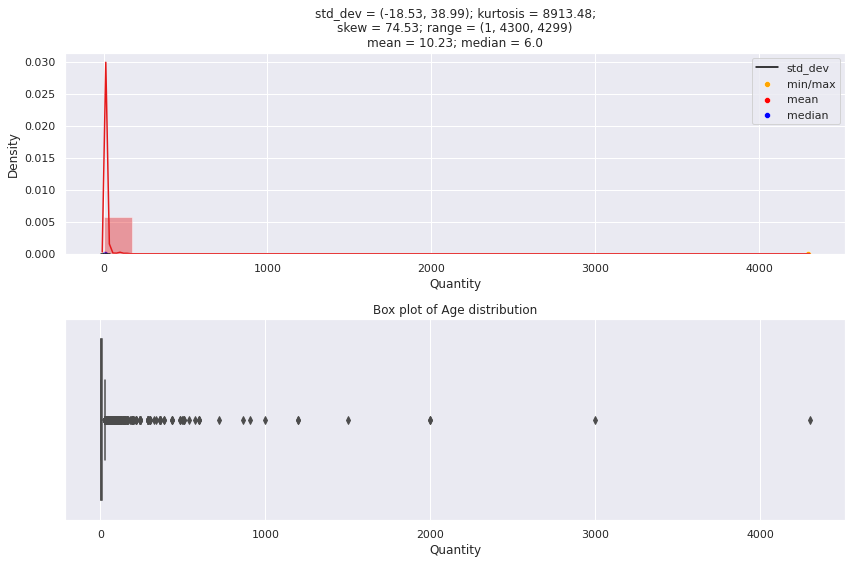

In [273]:
cont_univ(df['Quantity'])

##### Huge outliers can be seen in this variable

In [274]:
df[df['Quantity'] <= df['Quantity'].quantile(.99)]['Quantity'].describe()

count    75101.000000
mean         8.931785
std          9.070145
min          1.000000
25%          2.000000
50%          6.000000
75%         12.000000
max         60.000000
Name: Quantity, dtype: float64

##### we can see 99% quantile of the data, has the max orders of 100 and least is in negative( maybe be a cancelled order) 

<Figure size 720x576 with 0 Axes>

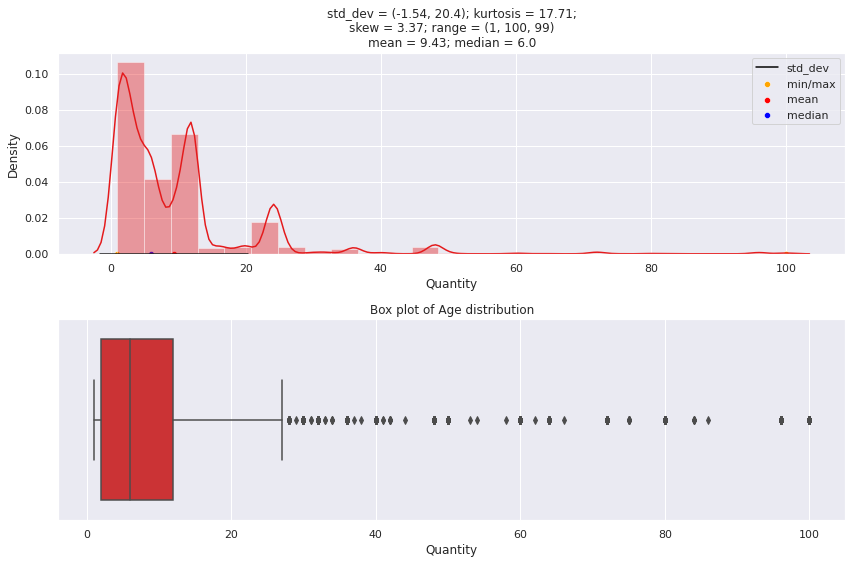

In [275]:
cont_univ(df[(df['Quantity'] > 0) & (df['Quantity'] <= 100)]['Quantity'])

### InvoiceDate

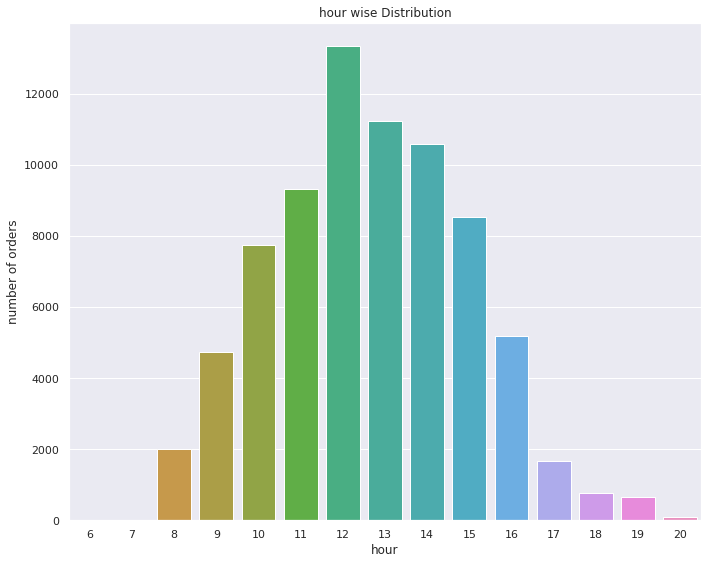

In [276]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['hour'])

plt.title('hour wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

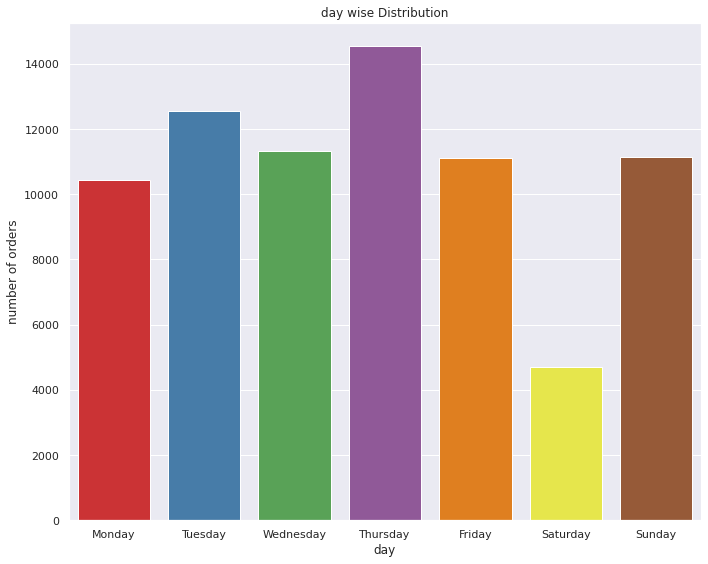

In [277]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['day'])

plt.title('day wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

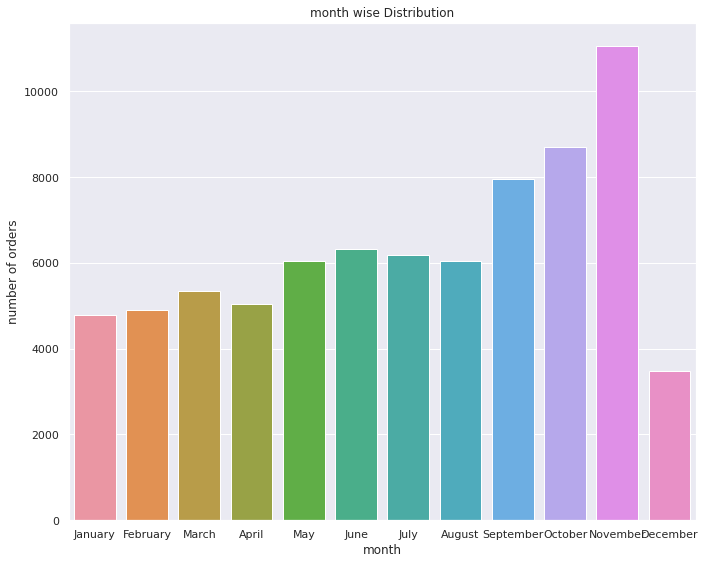

In [278]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['month'])

plt.title('month wise Distribution')
plt.ylabel('number of orders')

plt.tight_layout()

Text(0, 0.5, 'number of orders')

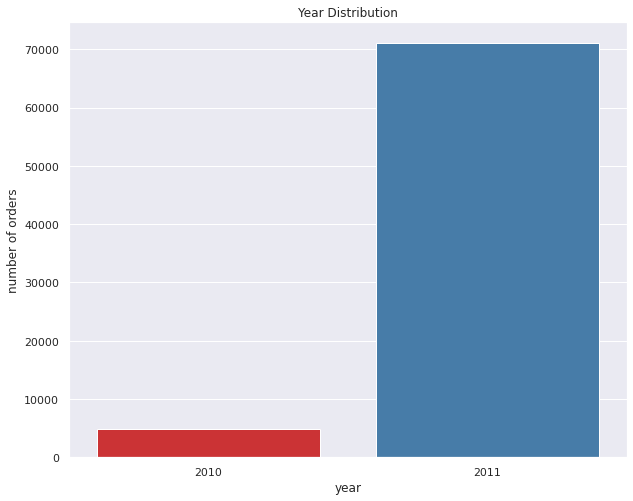

In [279]:
plt.figure(figsize=(10,8))

sns.countplot(df['year'])

plt.title('Year Distribution')
plt.ylabel('number of orders')

<Figure size 720x576 with 0 Axes>

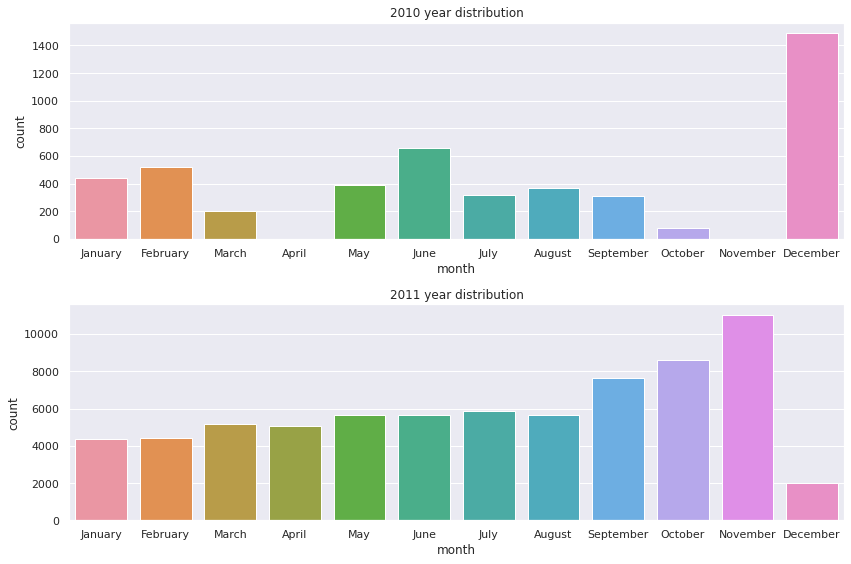

In [280]:
plt.figure(figsize=(10,8))
sns.set(palette="Set1")
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


sns.countplot(df[df['year'] == 2010]['month'],ax=ax[0])
ax[0].set_title('2010 year distribution')


sns.countplot(df[df['year'] == 2011]['month'],ax=ax[1])
ax[1].set_title('2011 year distribution')
plt.tight_layout()

# plt.title('Year Distribution')
# plt.ylabel('number of orders')

In [281]:
max(df['InvoiceDate'])

Timestamp('2011-12-10 17:19:00')

##### most of the order are placed in 2011, November is the highest month with more order.

can see a increasing trend in 2011

### UnitPrice

In [282]:
df['UnitPrice'].describe()

count    75841.000000
mean         2.943937
std          4.860477
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max        550.640000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

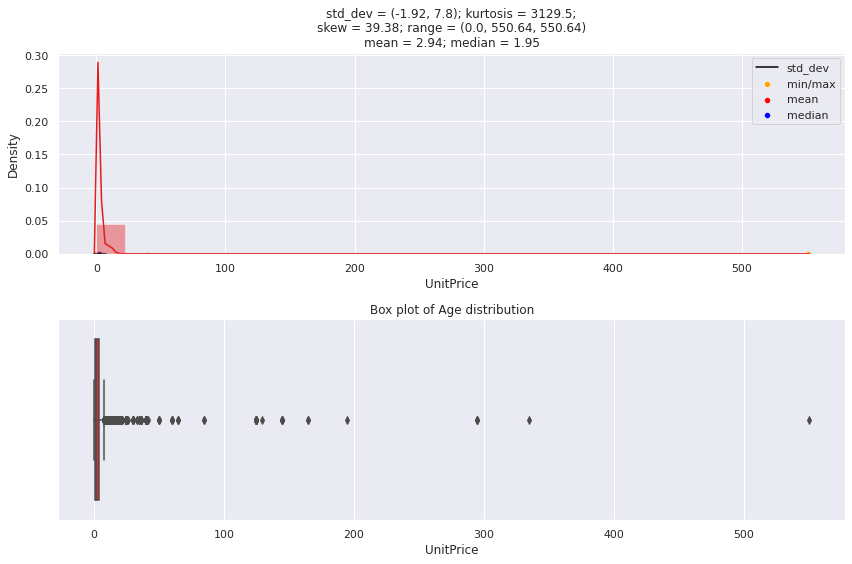

In [283]:
cont_univ(df['UnitPrice'])

In [284]:
df[df['UnitPrice'] <= df['UnitPrice'].quantile(.99)]['UnitPrice'].describe()

count    75143.000000
mean         2.733646
std          2.502716
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max         12.750000
Name: UnitPrice, dtype: float64

<Figure size 720x576 with 0 Axes>

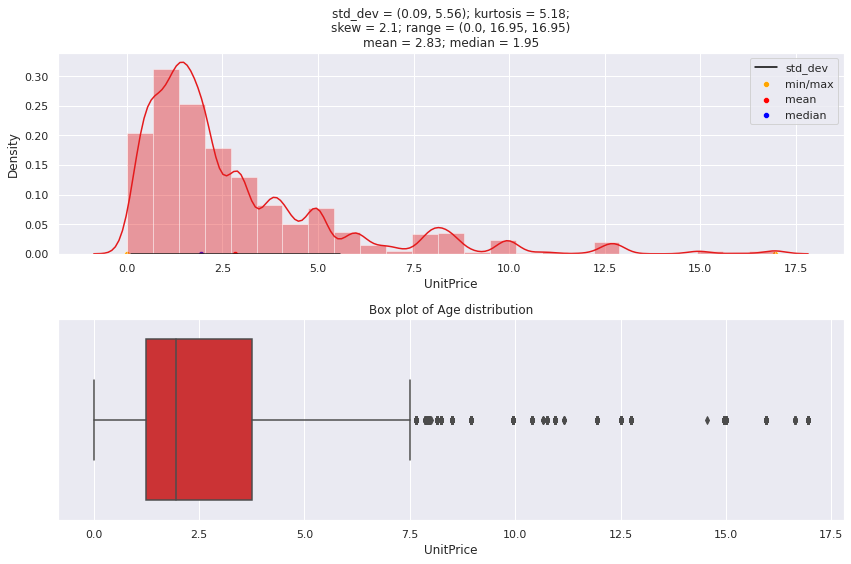

In [285]:
cont_univ(
    df[(df['UnitPrice'] > 0) & (df['UnitPrice'] <= 18) & (df['cancelled'] == 0)
       & (df['Description'] != 'Adjust bad debt')]['UnitPrice'])

### CustomerID

In [286]:
df['CustomerID'].nunique()

712

In [287]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
cancelled               int64
day                  category
month                category
year                    int64
hour                    int64
month_year             object
total_price           float64
Tier                   object
bad_debt                int64
recency                 int64
dtype: object

### Country

In [288]:
df['Country'].nunique()

1

In [289]:
round(df['Country'].value_counts(normalize=True)*100,1).apply(str) + "%"

United Kingdom    100.0%
Name: Country, dtype: object